## Logistic Regression Case Study on -

## Lead Scoring

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">



                               Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.
In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Goal

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


In [278]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [280]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**As we can see in Lead profile column select values are present which stands for Null values in the dataframe**

### Step 1 : Data Understanding

In [281]:
df.shape

(9240, 37)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [283]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2 : Data Cleaning & Handeling


We have to convert select values to null values

In [284]:
#Handeling select values
df = df.replace(['Select','select'],np.nan)

In [285]:
# checking the columns for null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [286]:
# Creating list of columns which have more than or equal to 40% of null values
null_columns = []
for i in df.columns:
  if df[i].isnull().sum() / df.shape[0] >= 0.4:
    null_columns.append(i)
print(null_columns)
print(len(null_columns))


['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
7


In [287]:
#Dropping columns which have more than 40% of null values
df.drop(null_columns , inplace = True, axis = 1)

In [288]:
#Checking again the null percentage in columns
df.isnull().sum() / df.shape[0] * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

**Checking for value counts in each columns which have null values**

In [289]:
#Creating function for the Bar plot of columns value counts
def values_count(var):
  plt.figure(figsize=[14,3])
  #sns.countplot(x = var, data = df)
  (var.value_counts(normalize = True)*100).plot.bar()
  plt.xticks(rotation = 55)
  plt.show()


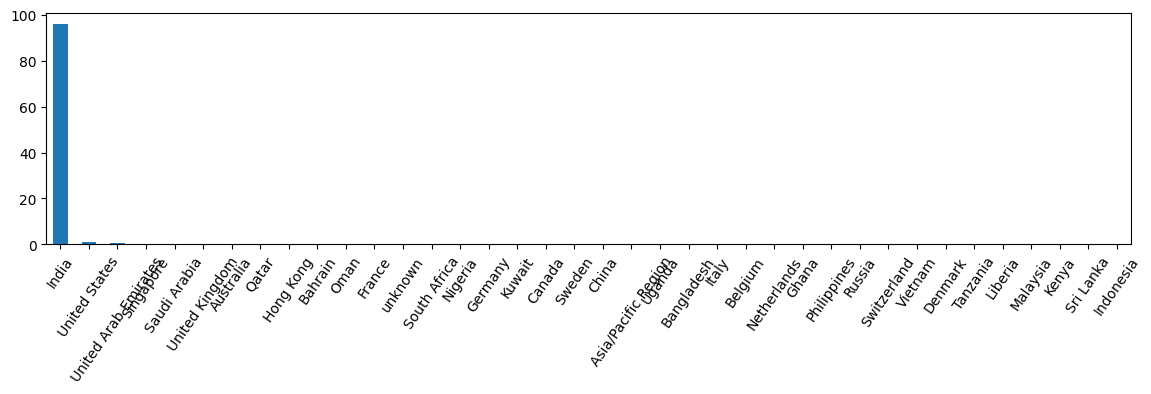

In [290]:
#Country column with 27% missing values
values_count(df.Country)

**As we can see the graph more than 95% learners or lead generated from India only, It is highly skewed data so we can drop this column**

In [291]:
df.drop('Country',1,inplace = True)

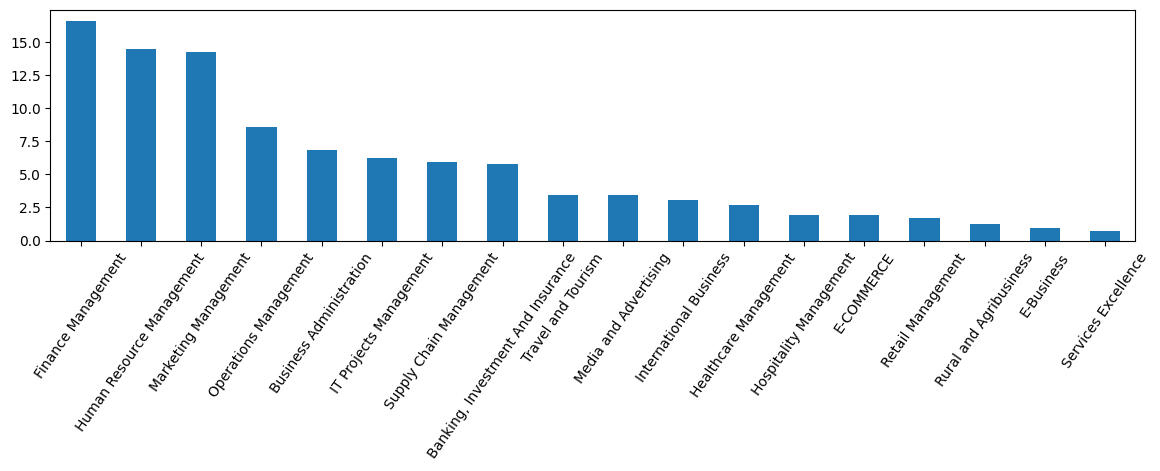

In [292]:
#Specialization column with 37% missing values
values_count(df.Specialization)

**There are high chances that students left this field unfilled or maybe learner didn't attempt this field,we will mark all missing row as Others as this column can be very important for further analysis.**

In [293]:
# Creating a separate category called 'Others' for this
df['Specialization'] = df['Specialization'].fillna('Others')

In [294]:
#Renaming columns
df.rename(columns = {'What is your current occupation':'Occupation','What matters most to you in choosing a course':'Reason'}, inplace = True)

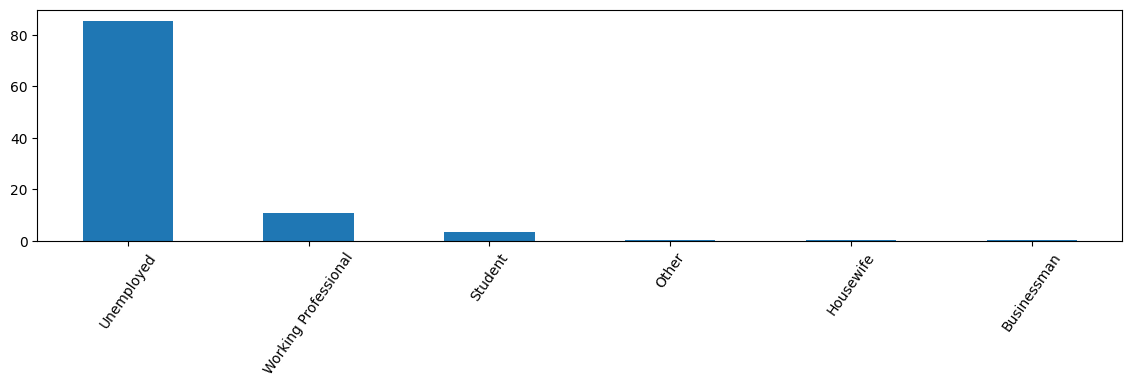

In [295]:
#occupation column with 29% missing values
values_count(df.Occupation)

**More than 80% of learners are unemployed so we can impute the missing values with 'Unemployed'**

In [296]:
# Imputing missing values with unemployed
df['Occupation'] = df['Occupation'].fillna('Unemployed')

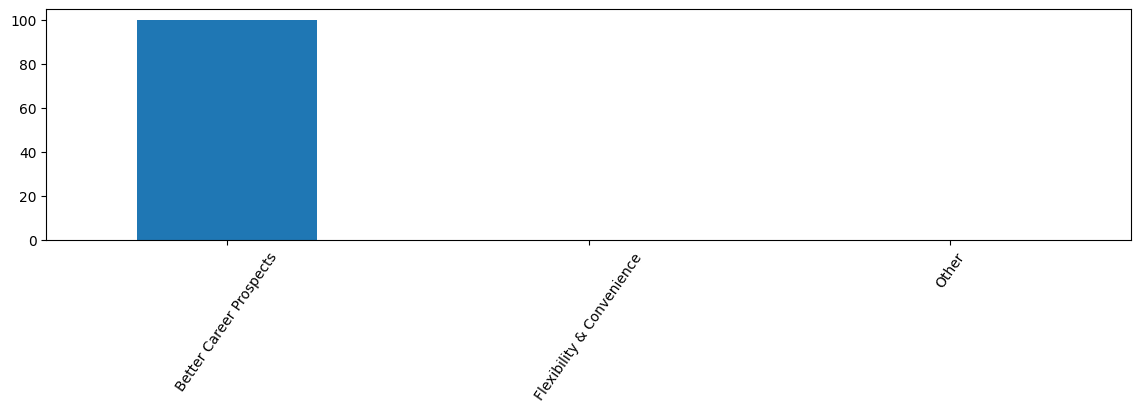

In [297]:
#Reason column with 29% missing values
values_count(df.Reason)

In [298]:
df['Reason'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Reason, dtype: int64

**Only 3 rows has different value than Better prospect so this column doesn't add any value to our analysis, We can drop this column**

In [299]:
#Dropping Reason column
df.drop('Reason',inplace= True,axis=1)

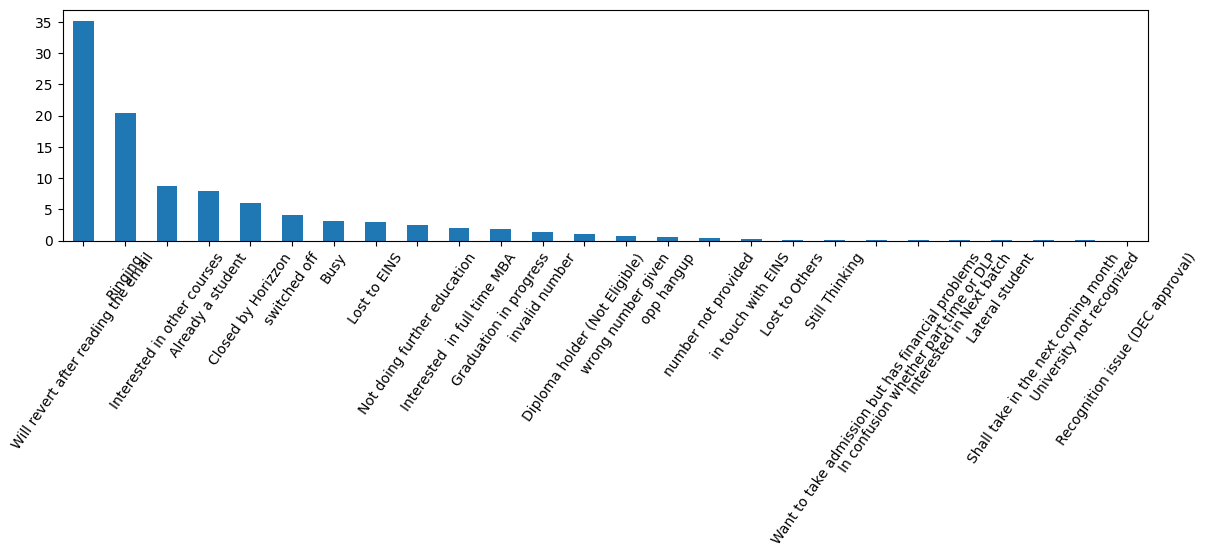

In [300]:
#Tags column with 36% missing values
values_count(df.Tags)

In [301]:
df.Tags.value_counts(normalize = True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

**Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.**

In [302]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
df['Tags']=df['Tags'].fillna('Will revert after reading the email')

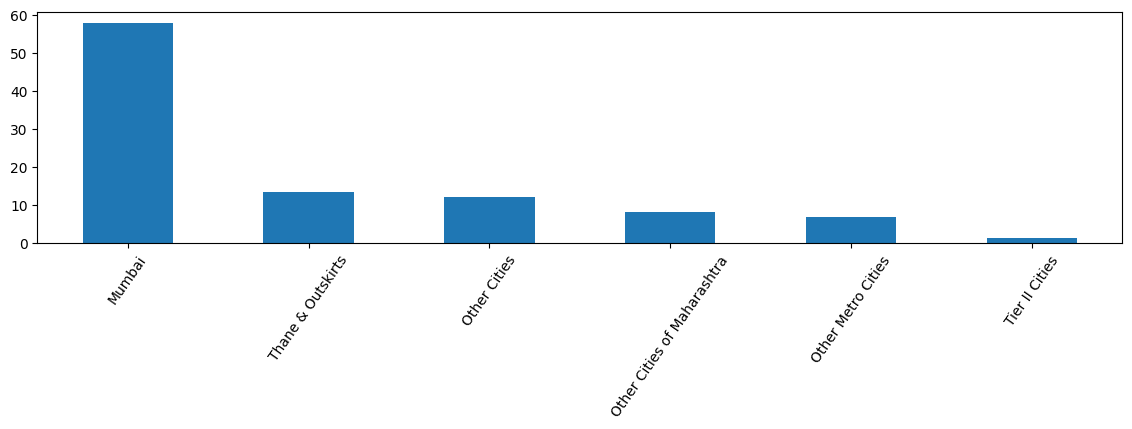

In [303]:
#City column with 40% missing values
values_count(df.City)

**Most of the learner are from 'Mumbai' , we can impute missing values in this column with this value as City can play important role in our analysis.**

In [304]:
# Imputing the missing data in the 'City' column with 'Mumbai'
df['City']=df['City'].fillna('Mumbai')

In [305]:
df.isnull().sum()/df.shape[0]*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
Occupation                                  0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [306]:
#Only few records have missing values so we can drop that rows
df.dropna(inplace = True)

In [307]:
#Checking null values count again
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
Occupation                                  0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

In [308]:
#checking for duplicated rows if any
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


**There is no duplicate rows in the dataframe**

In [309]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


**Lead number & Prospect id has all unique values in the dataframe so we can't derive any insights from this columns so we are droping these columns**

In [310]:
df.drop(['Prospect ID','Lead Number'],1,inplace = True)

## Step 3 : Explotary Data Analysis

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  Occupation                          

### Univariate Analysis


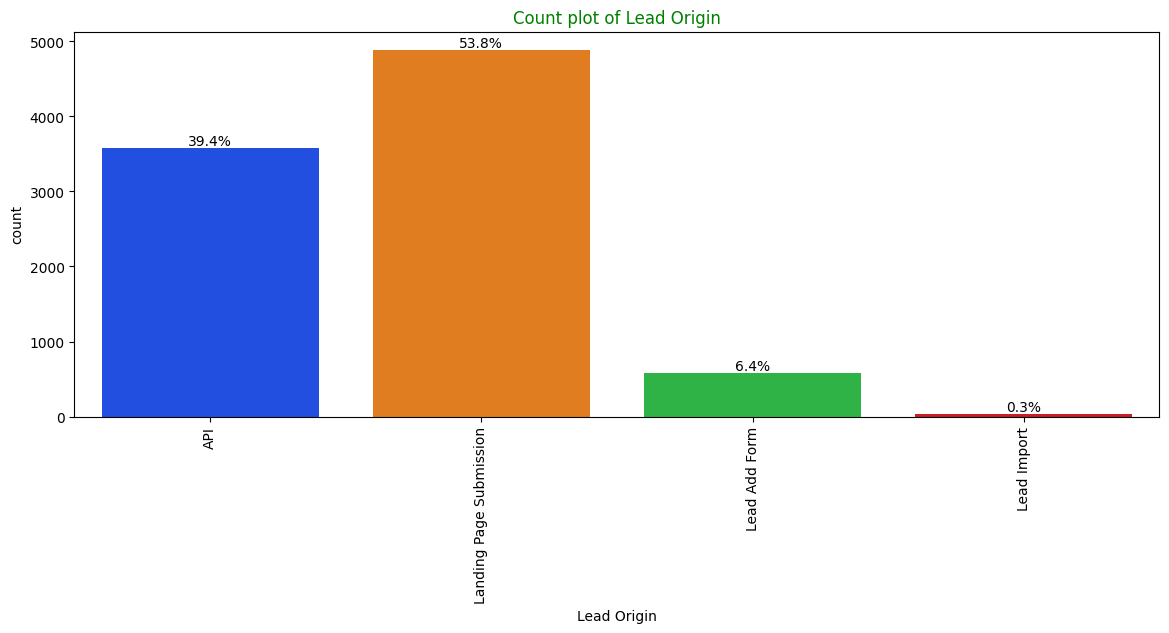

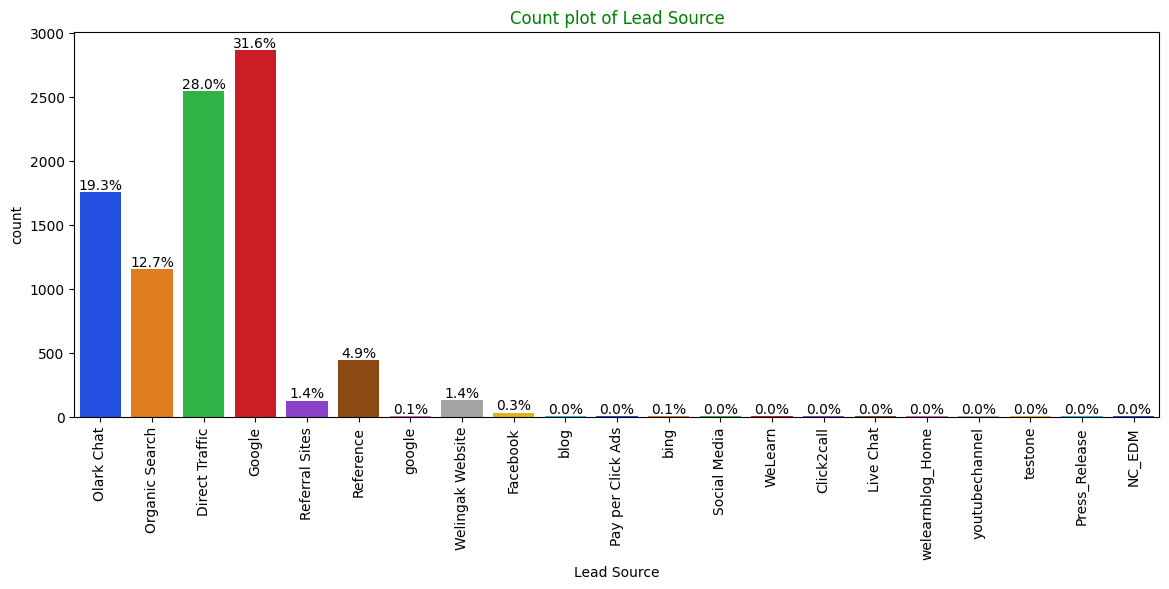

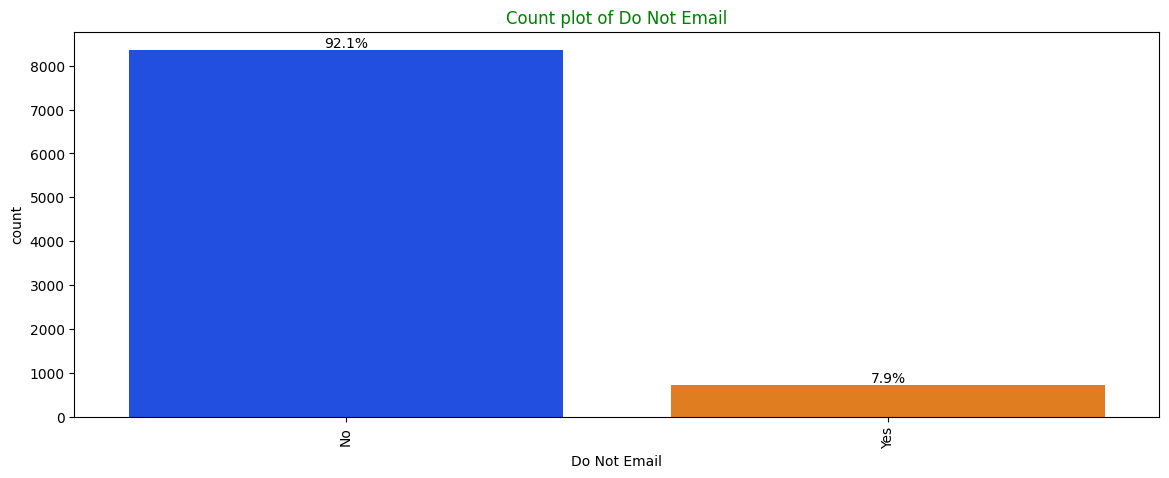

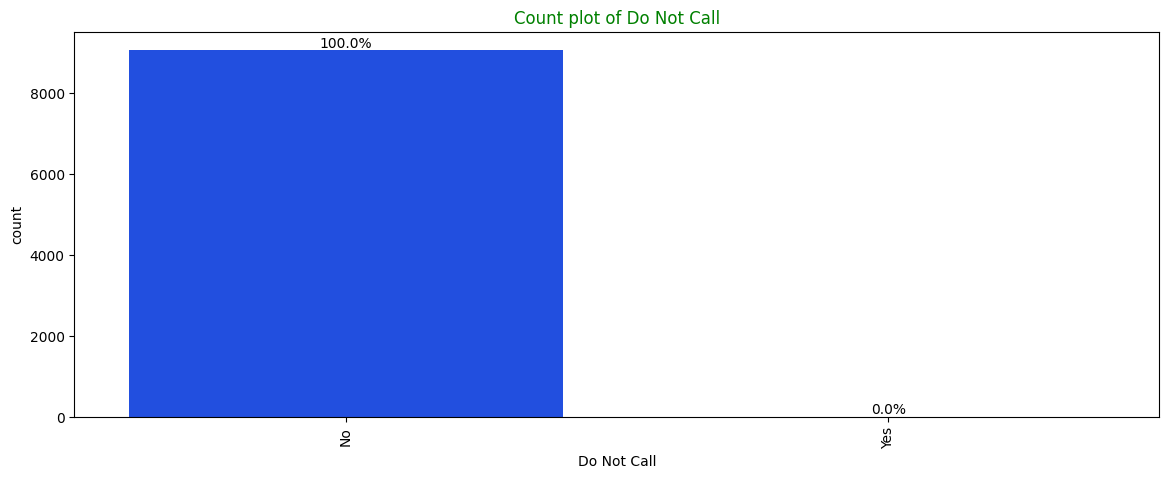

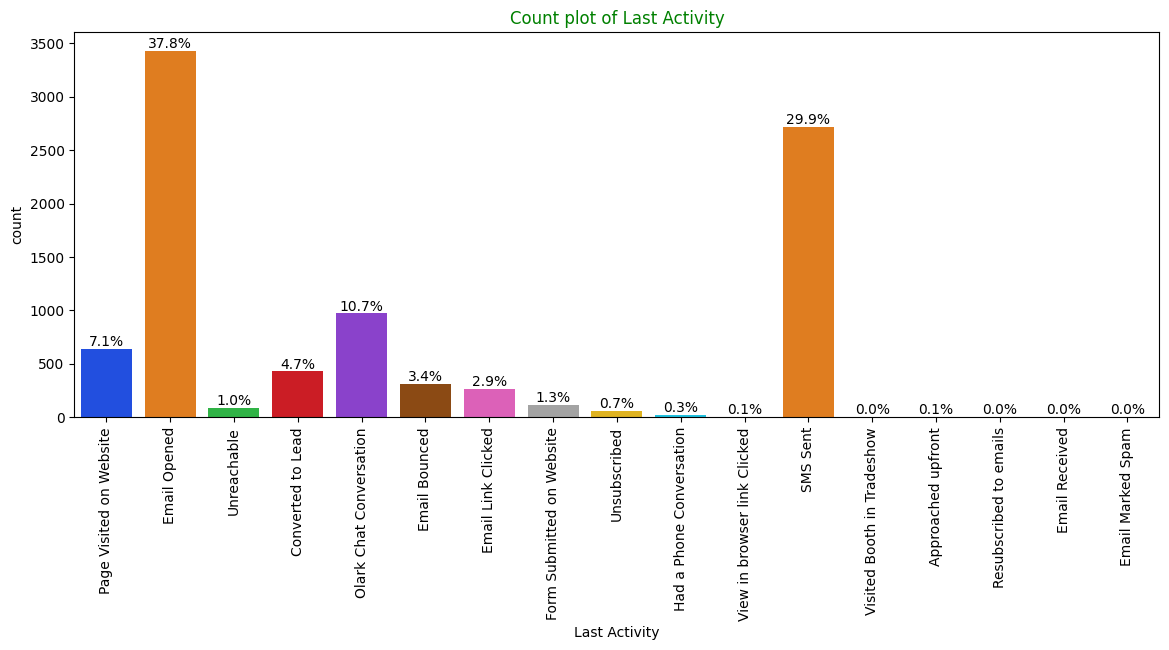

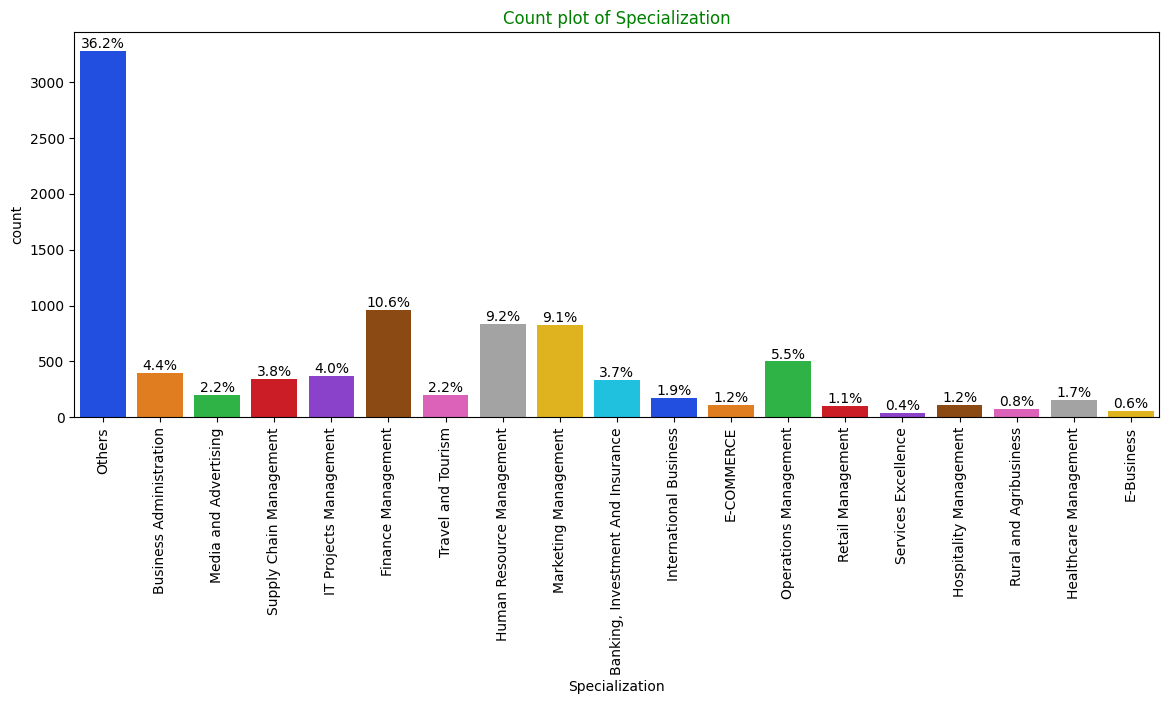

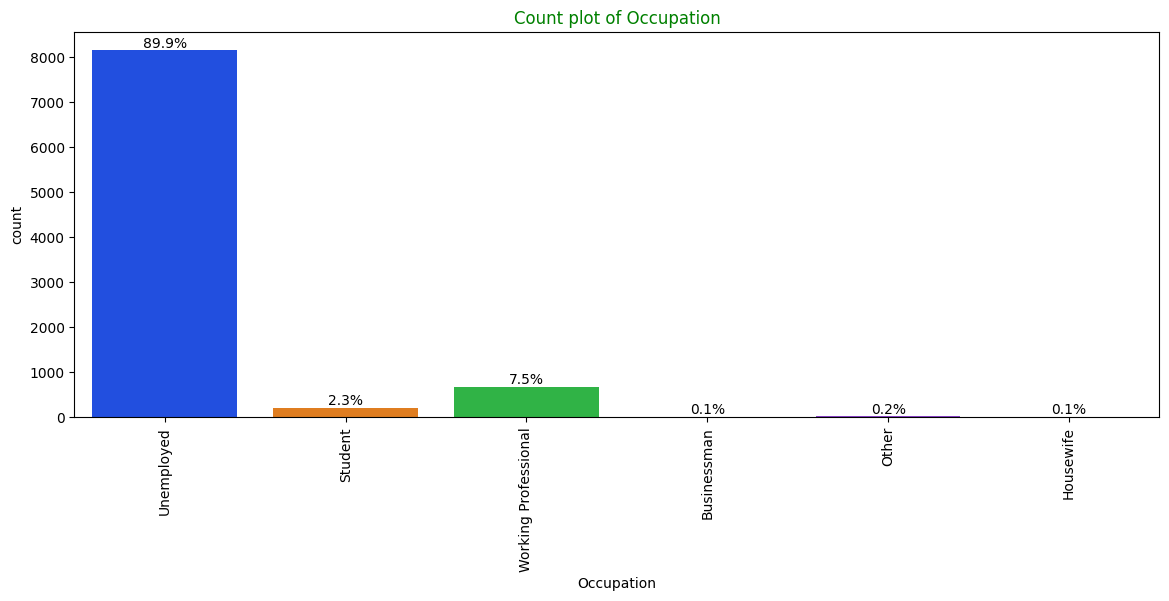

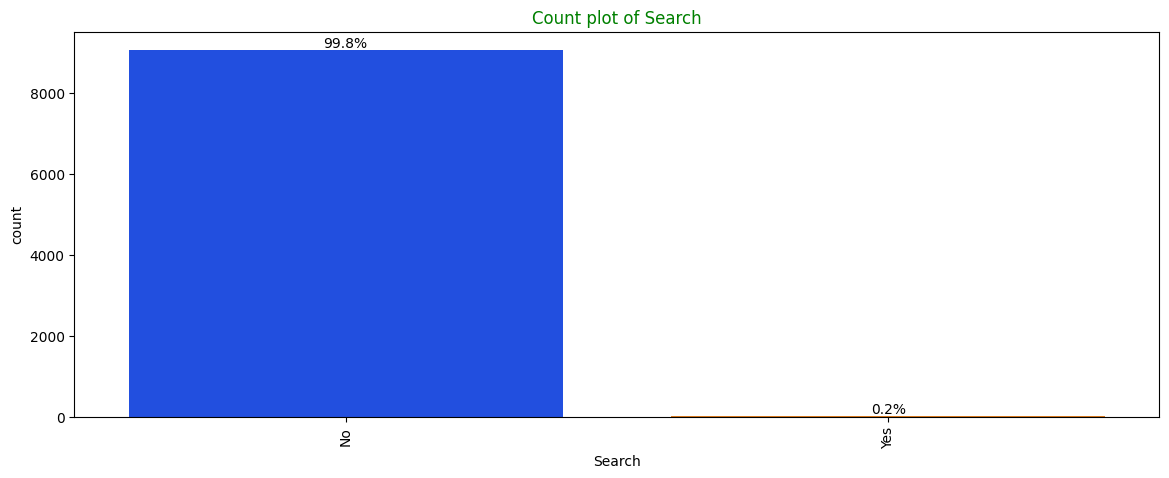

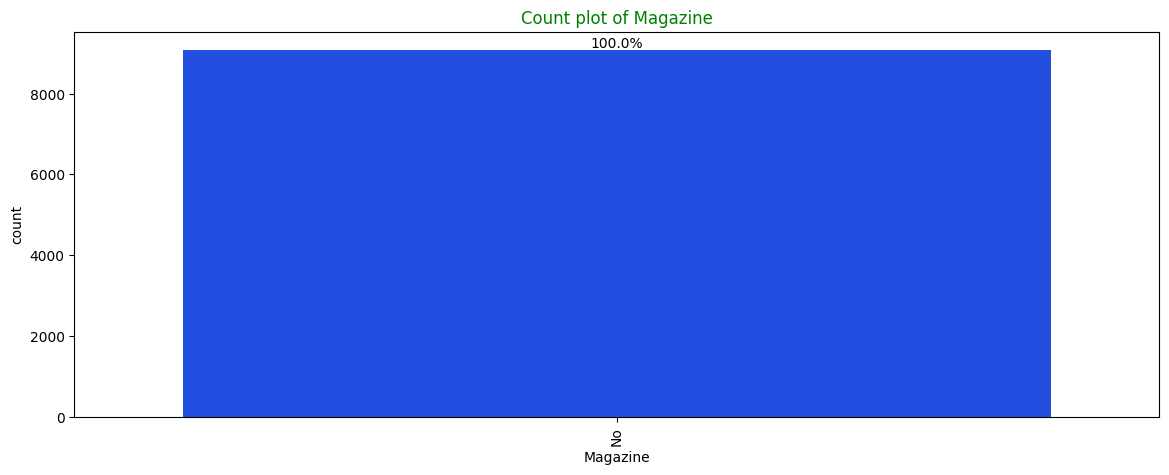

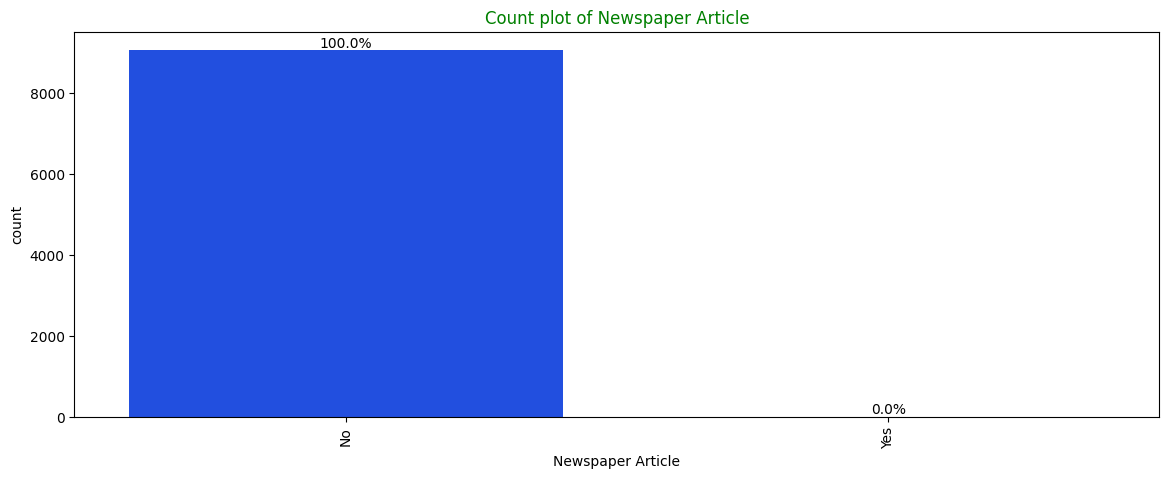

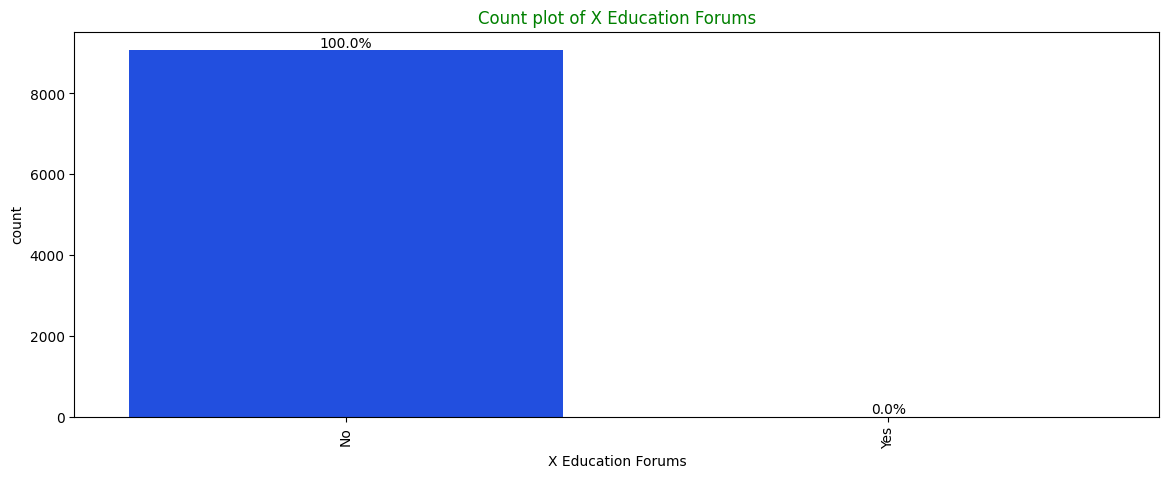

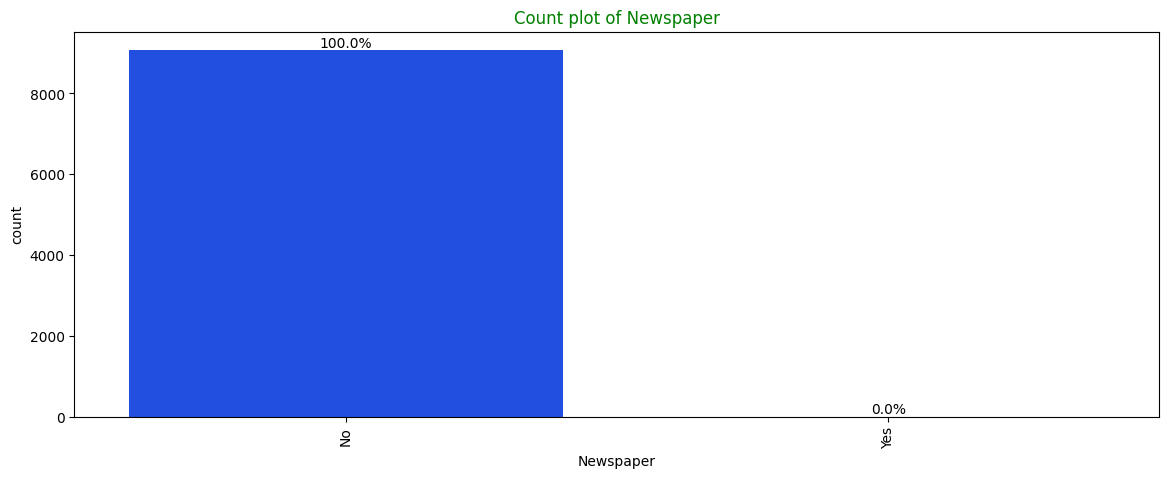

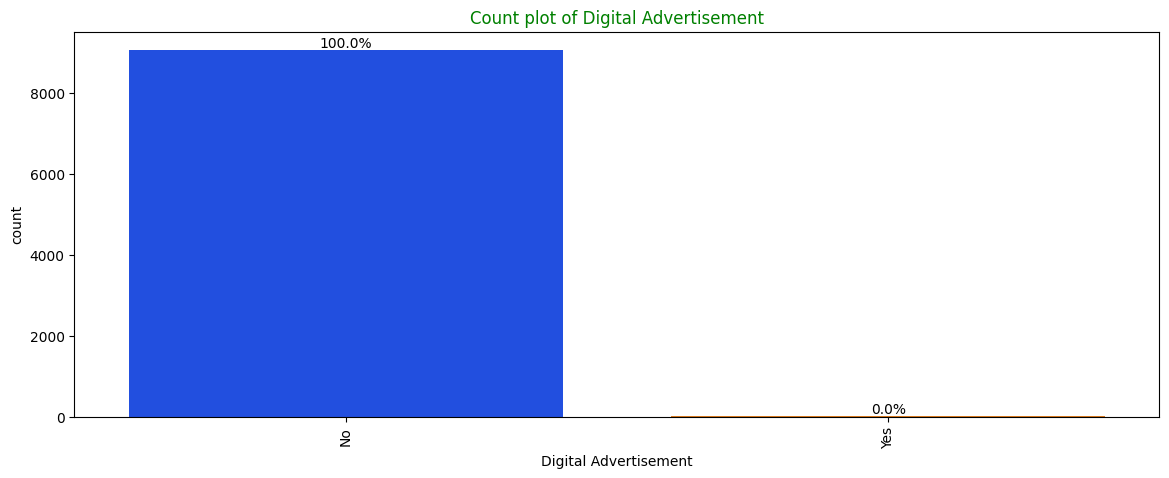

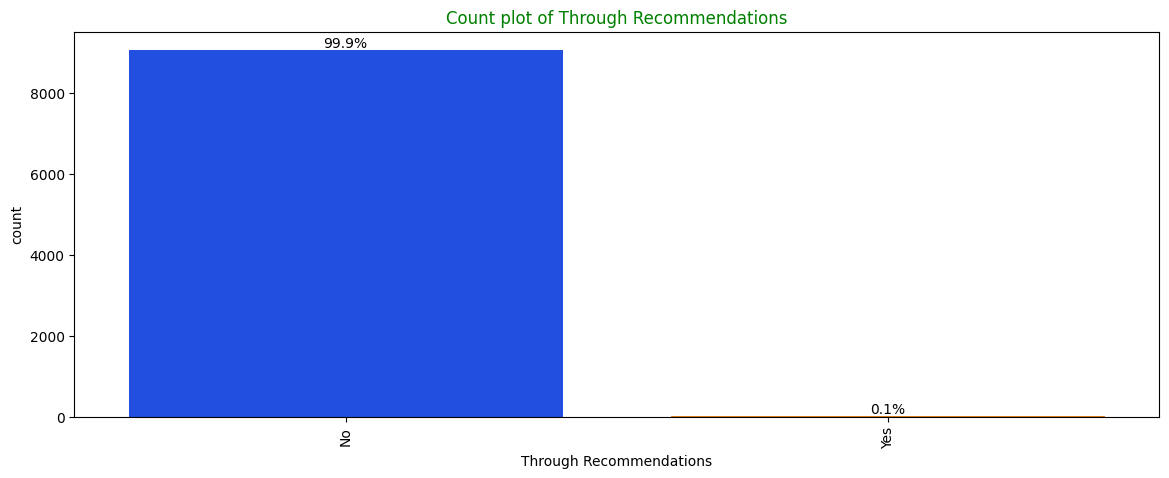

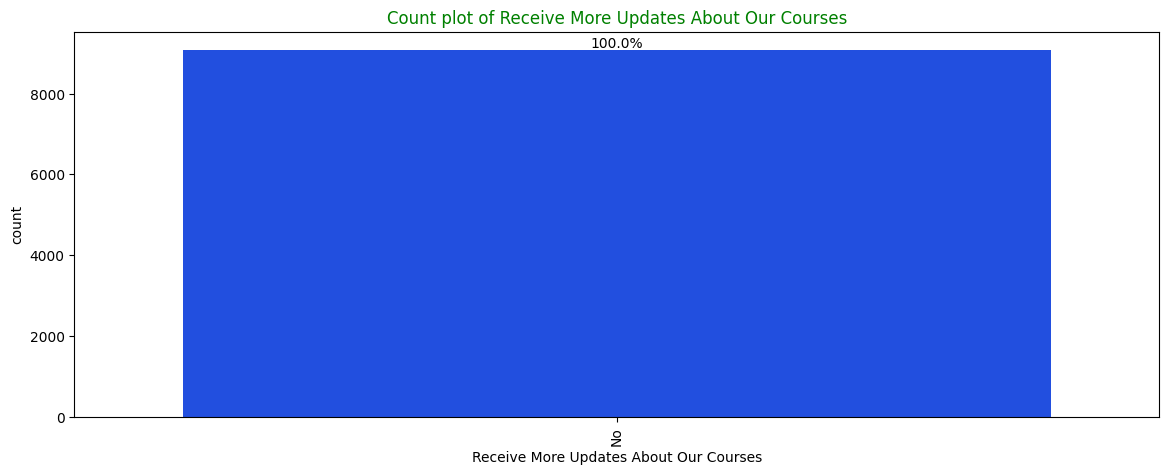

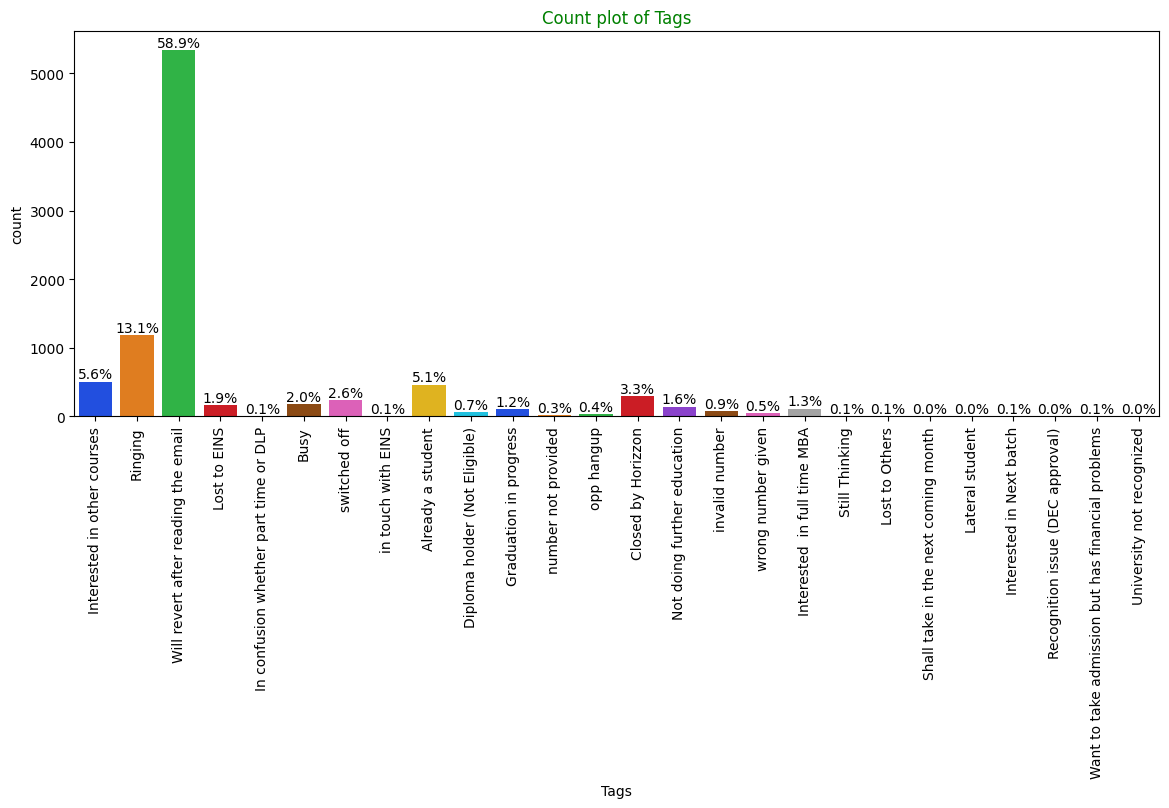

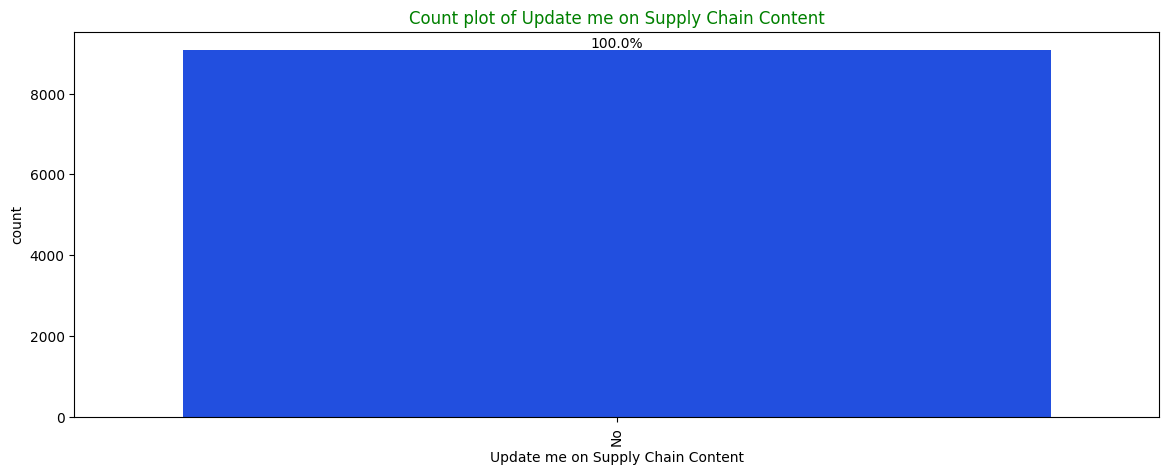

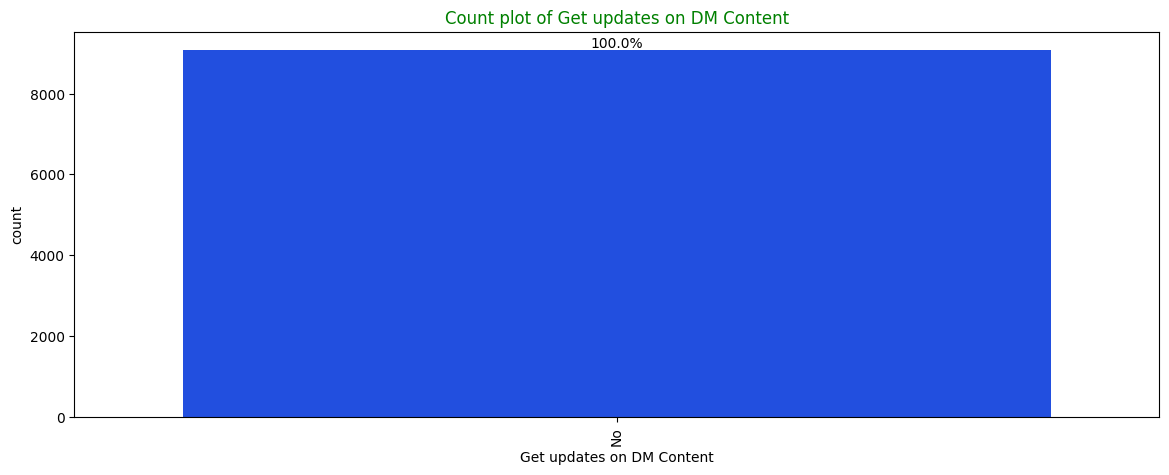

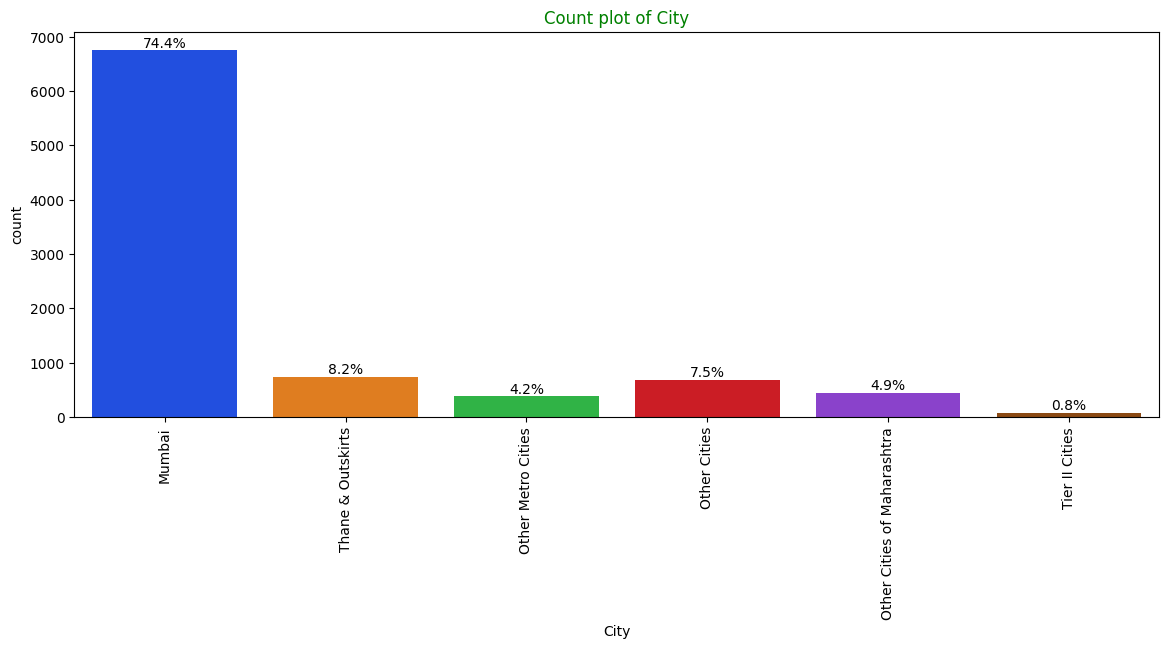

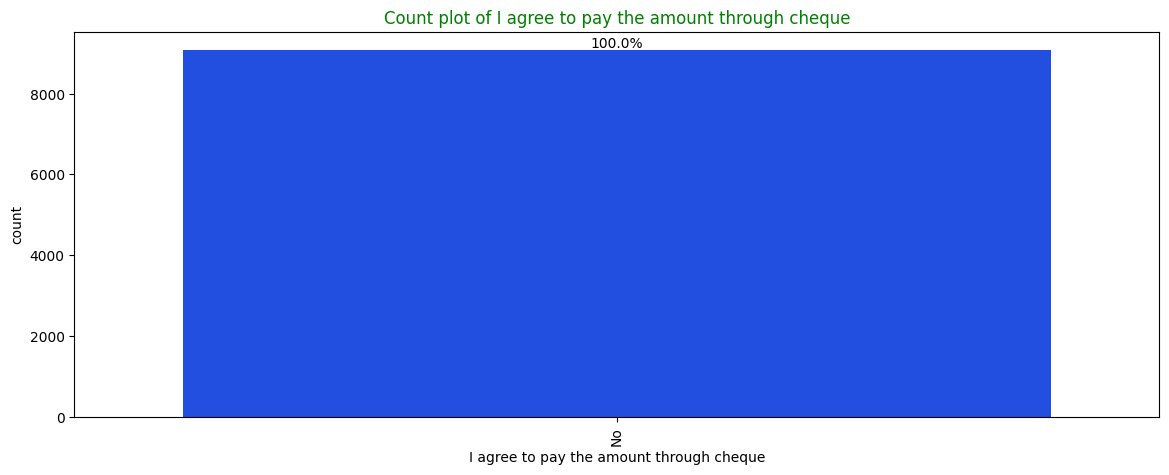

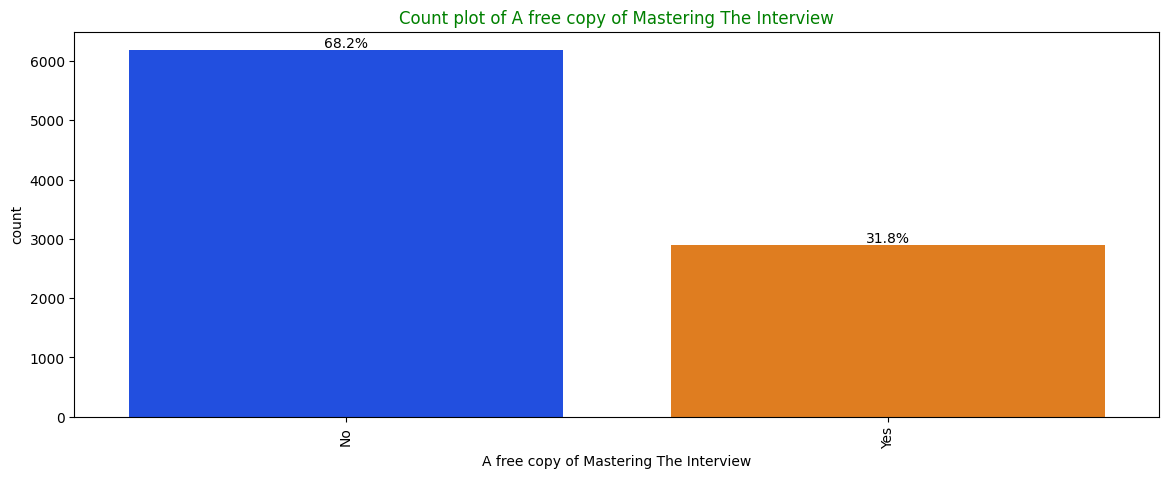

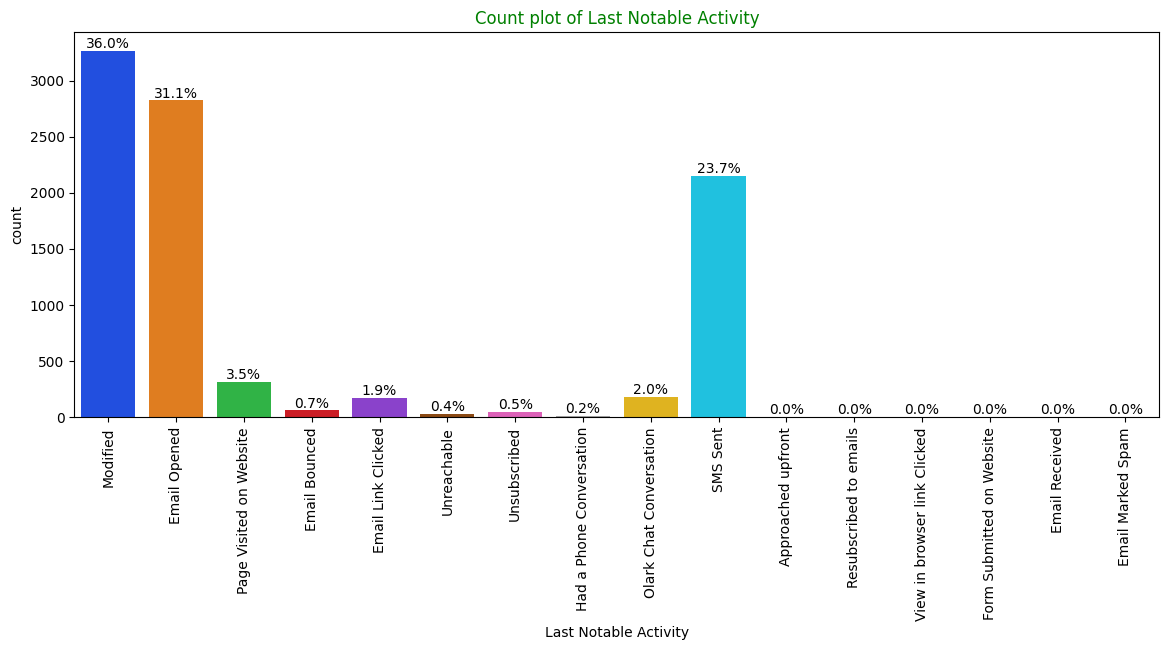

In [312]:
columnsList = df.select_dtypes(include=['category', 'object']).columns.tolist()

for i in columnsList[:]:
    plt.figure(figsize = [14,5])
    plt.title("Count plot of {}".format(i),color='green')
    ax = sns.countplot(x=i, data=df, palette='bright')
    total = len(df[i])
    plt.xticks(rotation=90)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

**As mentioned in the Problem Statement, Converted is our target variable**

In [313]:
df.Converted.value_counts(normalize = True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

**As we can see here, Total lead conversion rate is around 38%**

In [314]:
#Creating function for the Bia-variate analysis
def Countplot(var):
  plt.figure(figsize=(13,5))
  sns.countplot(x = var, hue = "Converted", data = df)
  plt.xticks(rotation = 65)


### Biavariate Analysis with Target varibale

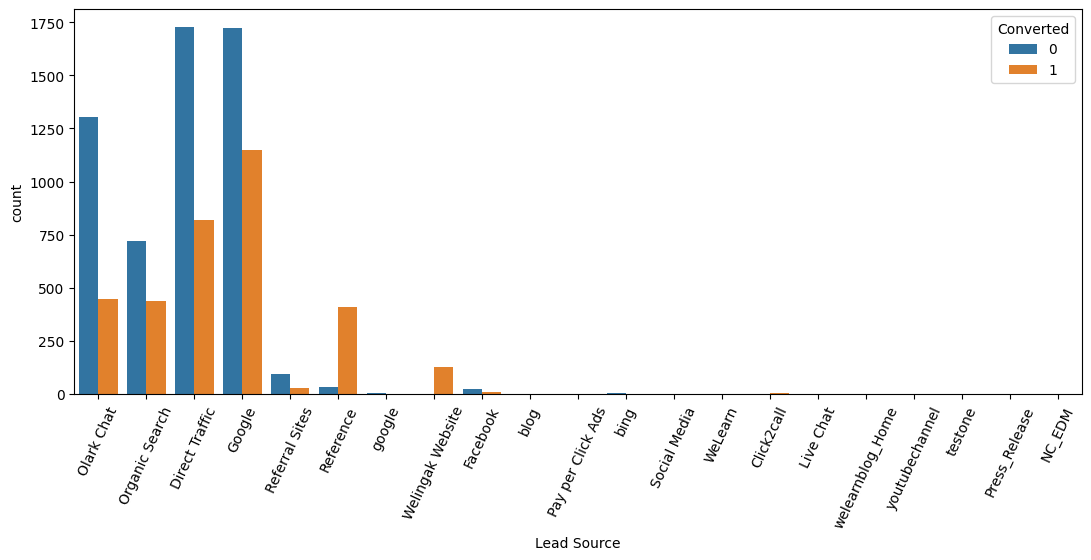

In [315]:
# 1)Lead source
Countplot(df['Lead Source'])

In [316]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [317]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values counts.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

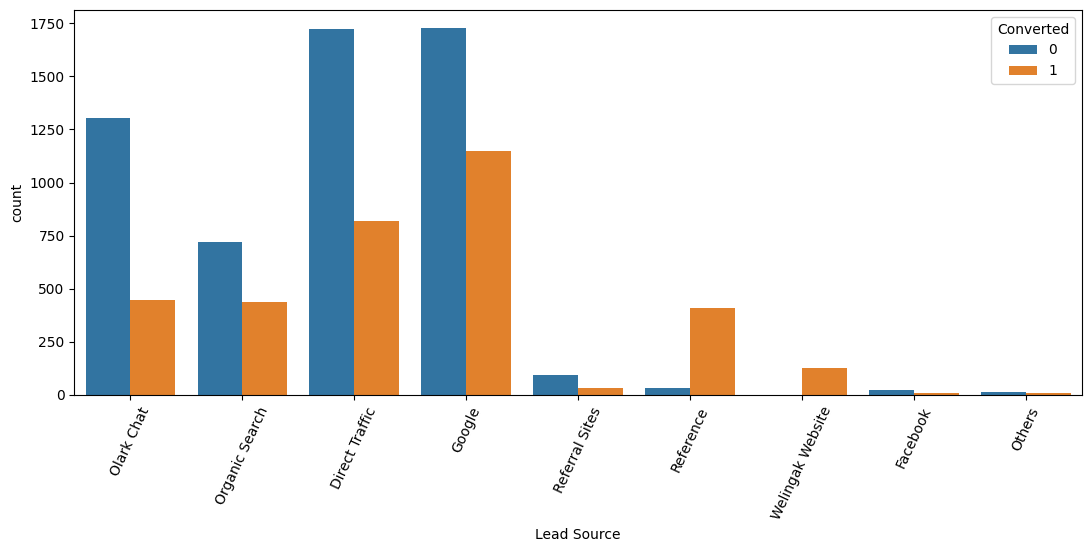

In [318]:
#checking again
Countplot(df['Lead Source'])

### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads(93%) and leads through welingak website is high(98%).

**To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.**

In [319]:
df.groupby('Lead Source')['Converted'].mean()

Lead Source
Direct Traffic      0.321667
Facebook            0.290323
Google              0.399234
Olark Chat          0.255562
Organic Search      0.377816
Others              0.391304
Reference           0.925508
Referral Sites      0.248000
Welingak Website    0.984496
Name: Converted, dtype: float64

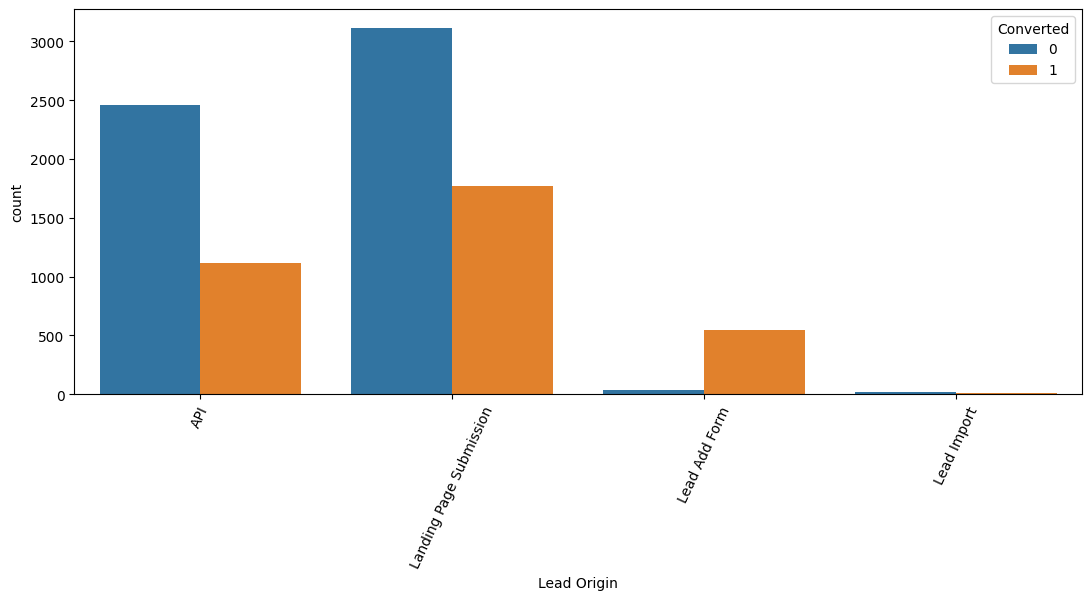

In [320]:
# 2) Lead origin
Countplot(df['Lead Origin'])

### Inference :
1. API and Landing Page Submission have 31% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 93% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

In [321]:
df.groupby('Lead Origin')['Converted'].mean()

Lead Origin
API                        0.311627
Landing Page Submission    0.361720
Lead Add Form              0.936317
Lead Import                0.300000
Name: Converted, dtype: float64

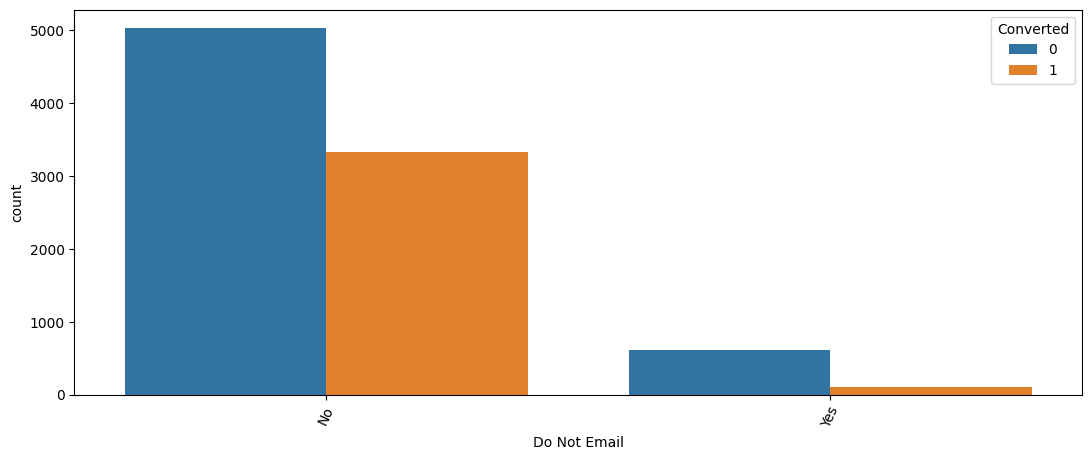

In [322]:
# 3) Do not email
Countplot(df['Do Not Email'])

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [323]:
df.groupby('Do Not Email')['Converted'].mean()

Do Not Email
No     0.398540
Yes    0.145251
Name: Converted, dtype: float64

In [324]:
df['Do Not Email'].value_counts(normalize = True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

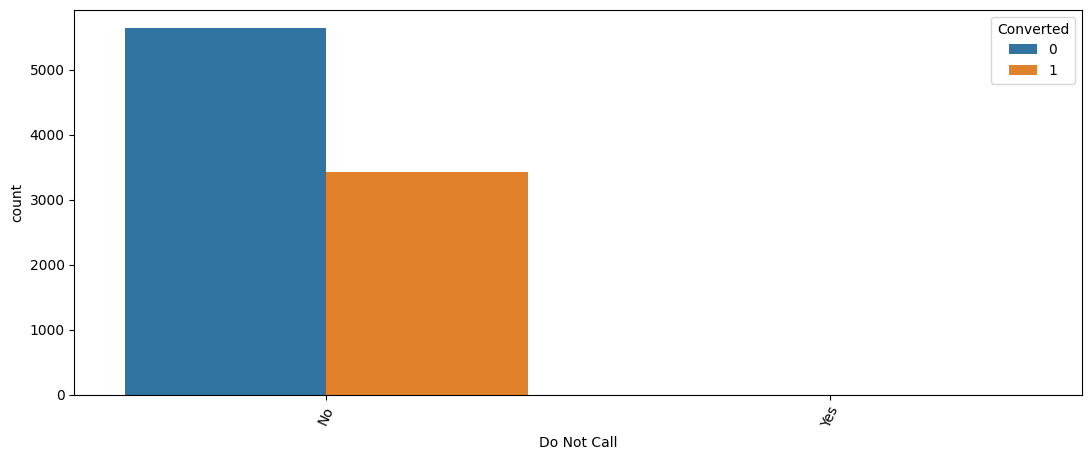

In [325]:
# 5) Do not call
Countplot(df['Do Not Call'])

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [326]:
df['Do Not Call'].value_counts(normalize = True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

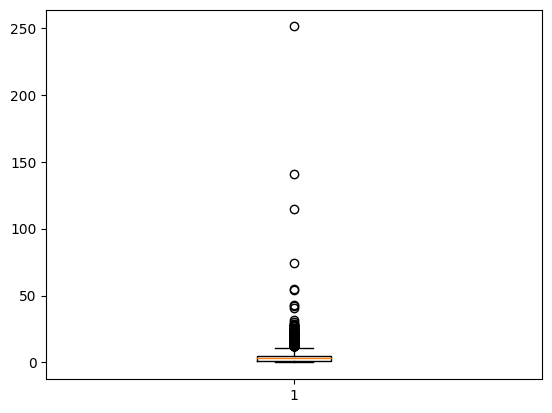

In [327]:
# 6) Total Visit :
plt.boxplot(df['TotalVisits'])
plt.show()

**As we can see here,There are many ouliers in this column. We will try to cap the values upto 95%**

In [328]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [329]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

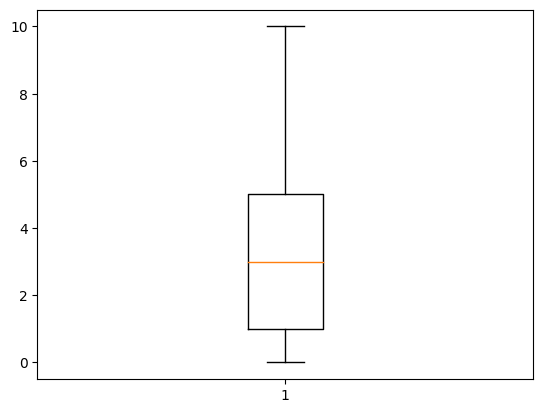

In [330]:
plt.boxplot(df['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

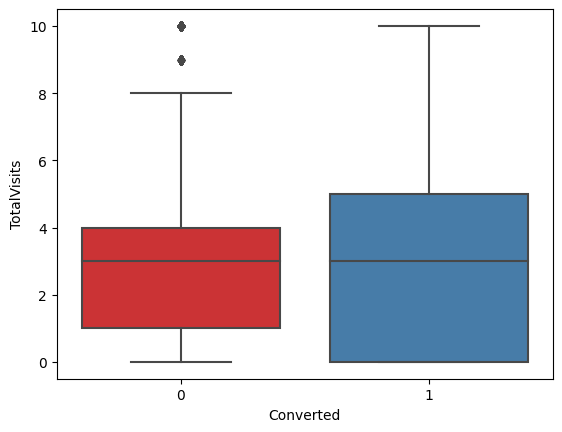

In [331]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df,palette='Set1')

### Inference
* Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

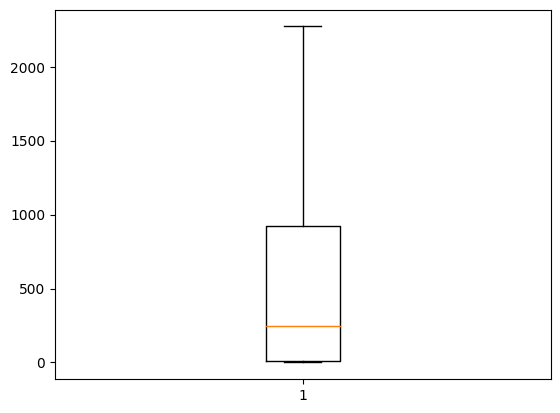

In [332]:
# 7) Total time spent
plt.boxplot(df['Total Time Spent on Website'])
plt.show()

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

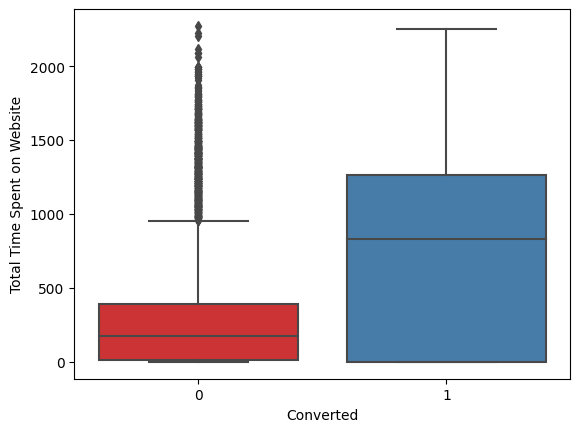

In [333]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,palette='Set1')

### Inference
* Leads spending more time on the weblise are more likely to be converted.

**Website should be made more engaging to make leads spend more time.**

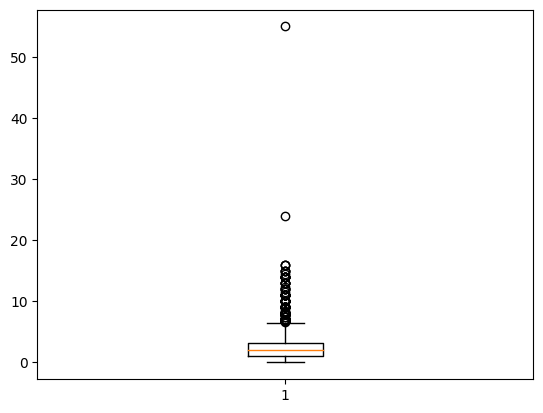

In [334]:
# 8) Pages per visit
plt.boxplot(df['Page Views Per Visit'])
plt.show()

**As we can see here,There are many ouliers in this column. We will try to cap the values upto 95%**

In [335]:
df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [336]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

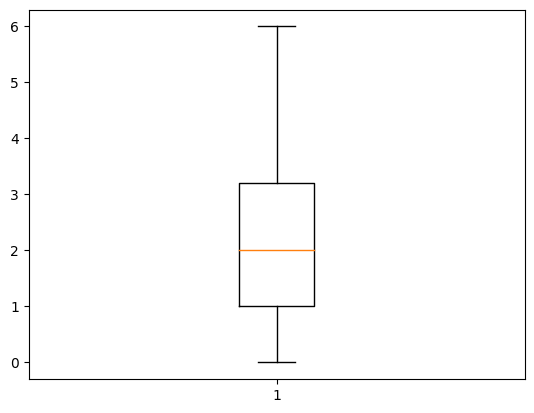

In [337]:
plt.boxplot(df['Page Views Per Visit'])
plt.show()

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

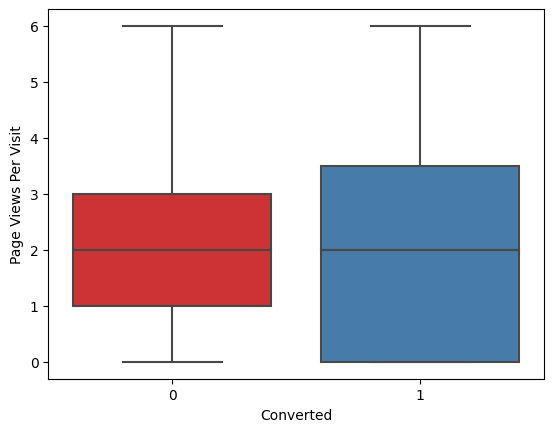

In [338]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df,palette='Set1')

### Inference
* Median for converted and unconverted leads is the same.

**Nothing can be said specifically for lead conversion from Page Views Per Visit**

In [339]:
# 9) Last activity
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

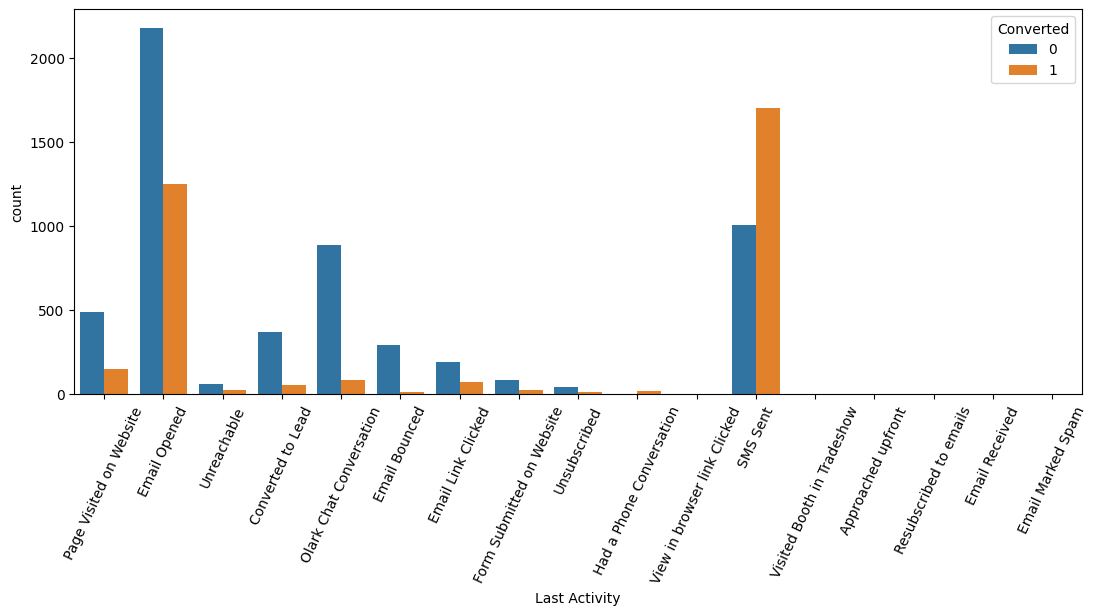

In [340]:
Countplot(df['Last Activity'])

In [341]:
# We can club the last activities to "Other_Activity" which are having less data.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

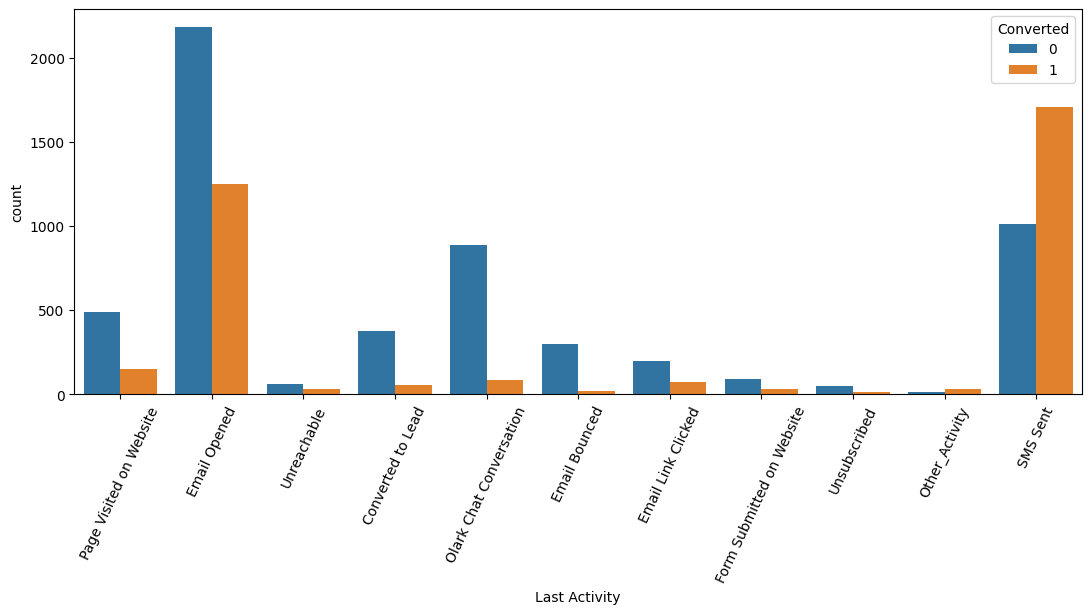

In [342]:
Countplot(df['Last Activity'])

### Inference
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 63%.

In [343]:
df.groupby('Last Activity')['Converted'].mean()

Last Activity
Converted to Lead            0.126168
Email Bounced                0.051282
Email Link Clicked           0.273408
Email Opened                 0.364219
Form Submitted on Website    0.241379
Olark Chat Conversation      0.086420
Other_Activity               0.738095
Page Visited on Website      0.235937
SMS Sent                     0.627761
Unreachable                  0.322222
Unsubscribed                 0.237288
Name: Converted, dtype: float64

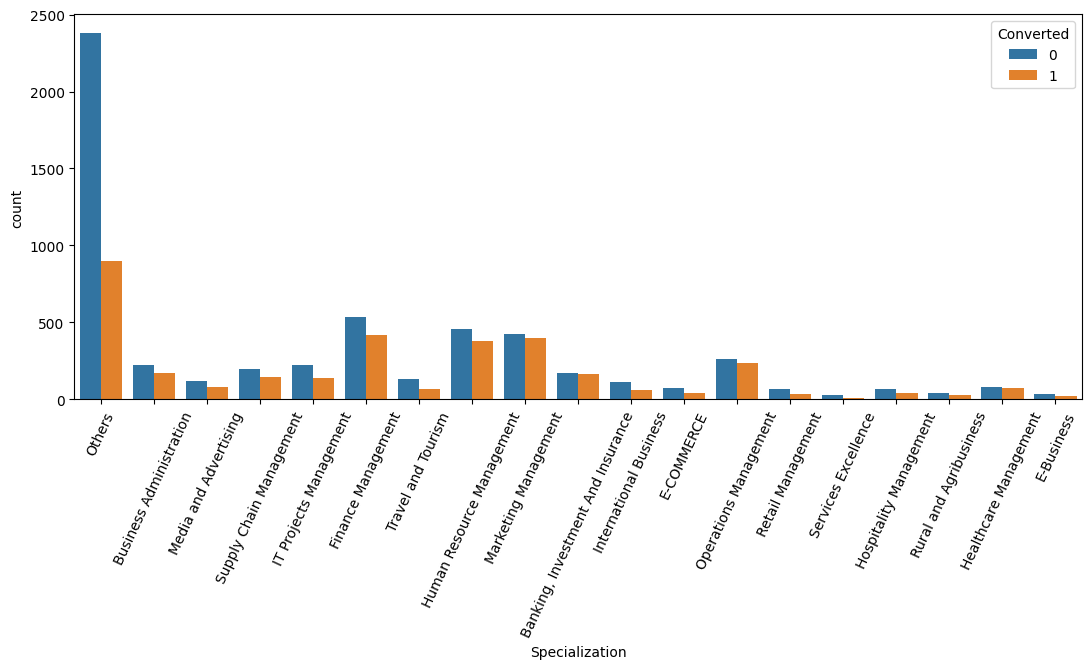

In [344]:
# 10) Specialization
Countplot(df.Specialization)


### Inference
**Focus should be more on the Specialization with high conversion rate.**

In [345]:
df.groupby('Specialization')['Converted'].mean()

Specialization
Banking, Investment And Insurance    0.489552
Business Administration              0.438596
E-Business                           0.368421
E-COMMERCE                           0.351351
Finance Management                   0.440042
Healthcare Management                0.487179
Hospitality Management               0.405405
Human Resource Management            0.454002
IT Projects Management               0.382514
International Business               0.352273
Marketing Management                 0.482382
Media and Advertising                0.415842
Operations Management                0.468938
Others                               0.274528
Retail Management                    0.340000
Rural and Agribusiness               0.424658
Services Excellence                  0.275000
Supply Chain Management              0.427746
Travel and Tourism                   0.351485
Name: Converted, dtype: float64

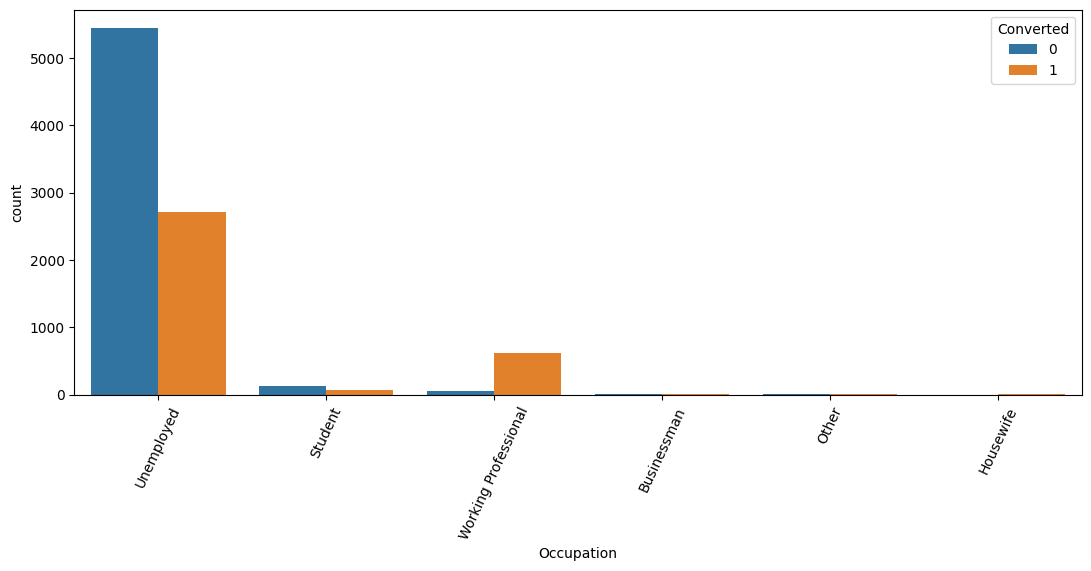

In [346]:
# What is your current occupation
Countplot(df['Occupation'])

### Inference
1. Working Professionals going for the course have high chances of joining it around 92%.
2. Unemployed leads are the most in numbers but has around 33% conversion rate where as student are around at 36% conversion rate.

In [347]:
df.groupby('Occupation')['Converted'].mean()

Occupation
Businessman             0.625000
Housewife               1.000000
Other                   0.600000
Student                 0.359223
Unemployed              0.332884
Working Professional    0.918759
Name: Converted, dtype: float64

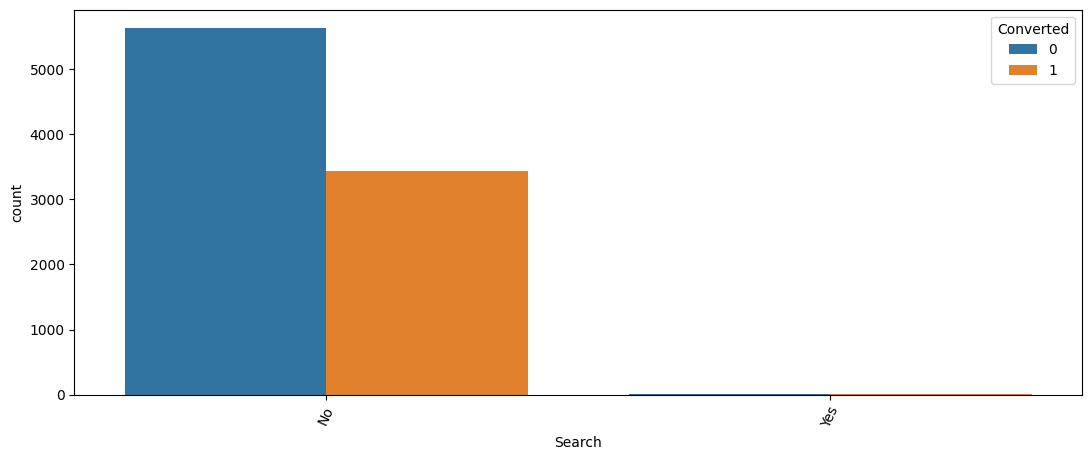

In [348]:
# 12) Search
Countplot(df['Search'])

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [349]:
df['Search'].value_counts(normalize = True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

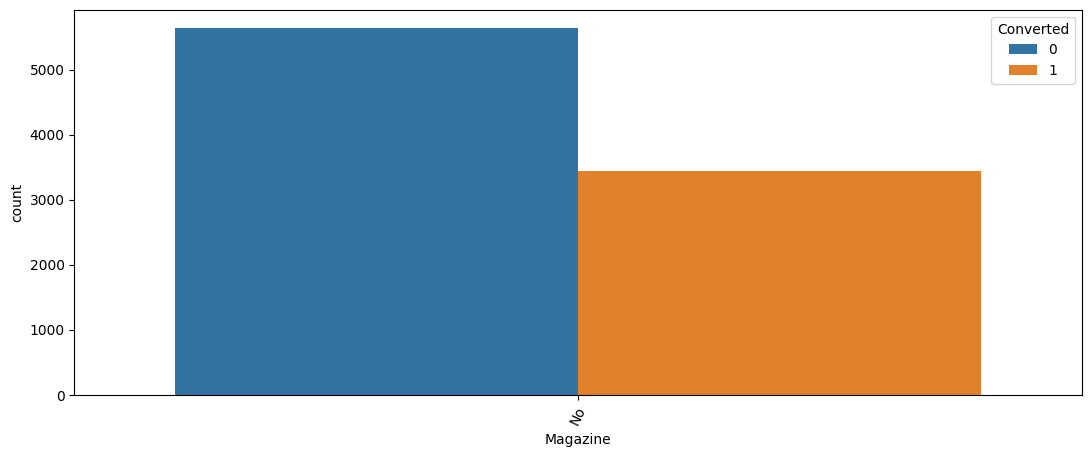

In [350]:
# 13)Magazine
Countplot(df['Magazine'])

In [351]:
df['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

**Since all the values in this column are No we can drop this column**

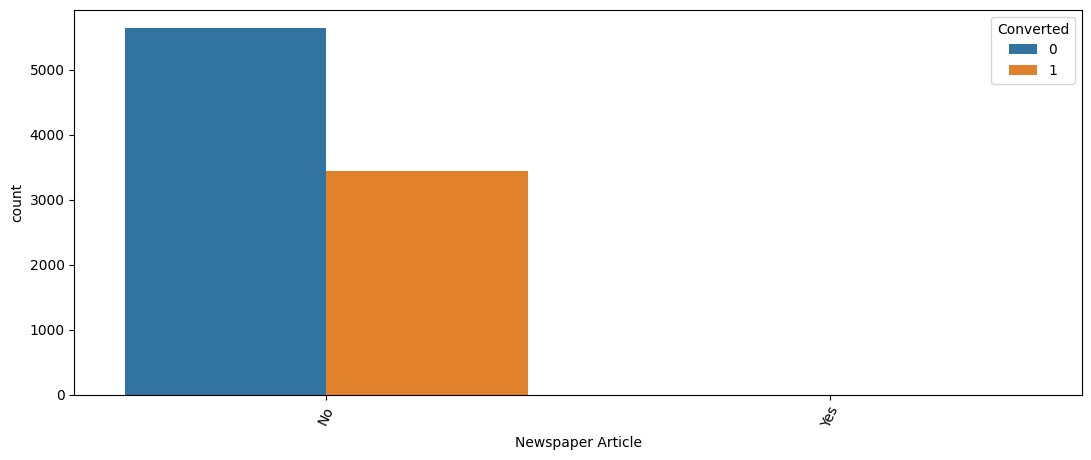

In [352]:
# 14) Newspaper Article
Countplot(df['Newspaper Article'])

In [353]:
df['Newspaper Article'].value_counts(normalize = True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

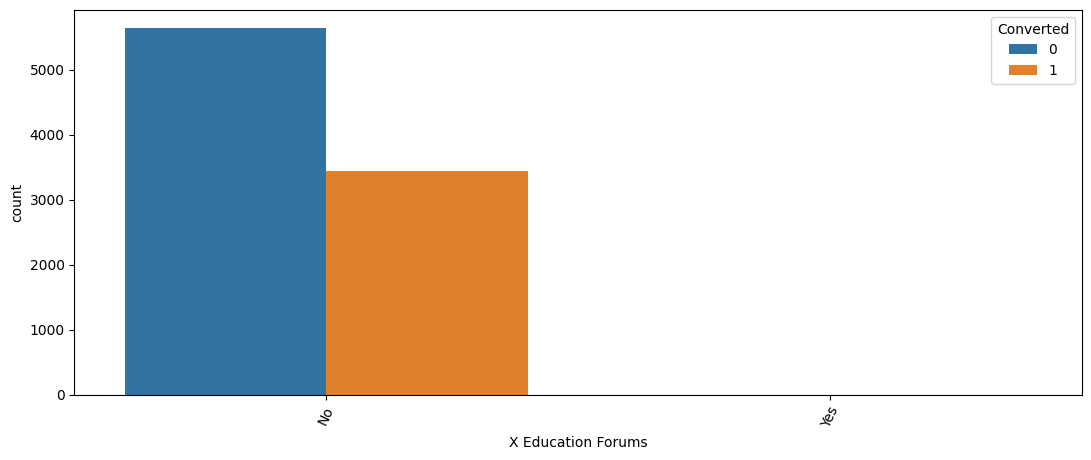

In [354]:
# 15) X education Article
Countplot(df['X Education Forums'])
df['X Education Forums'].value_counts(normalize = True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

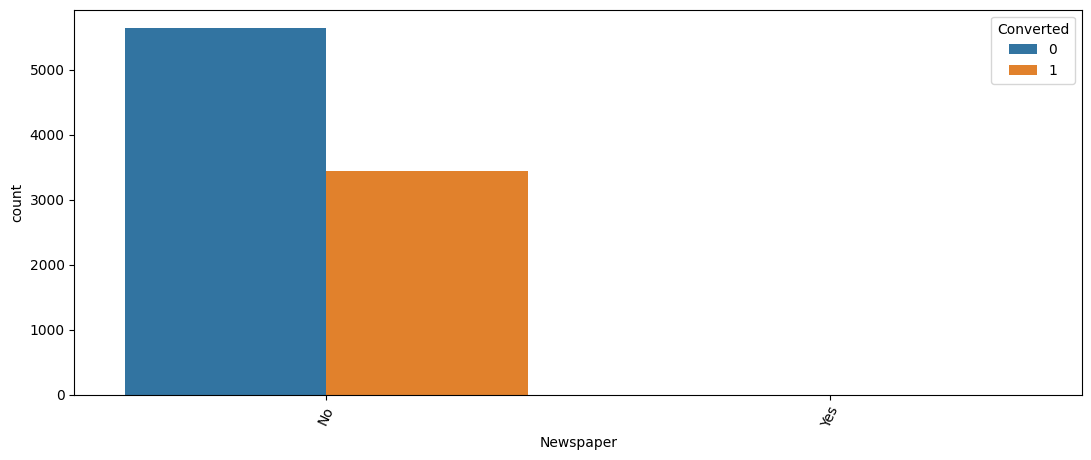

In [355]:
# 16) Newspaper
Countplot(df['Newspaper'])
df['Newspaper'].value_counts(normalize = True)

No     0.999559
Yes    0.000441
Name: Digital Advertisement, dtype: float64

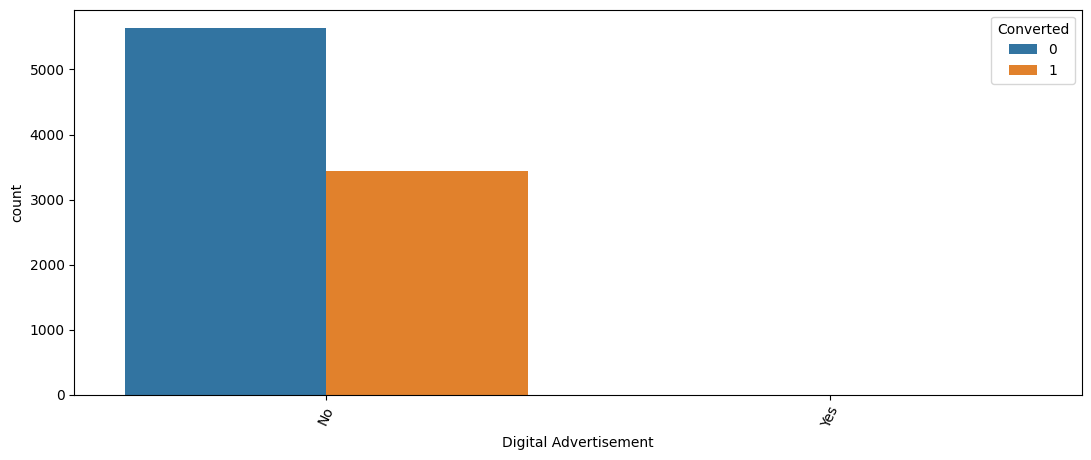

In [356]:
# 17) Digital Advertisement
Countplot(df['Digital Advertisement'])
df['Digital Advertisement'].value_counts(normalize = True)

No     0.999229
Yes    0.000771
Name: Through Recommendations, dtype: float64

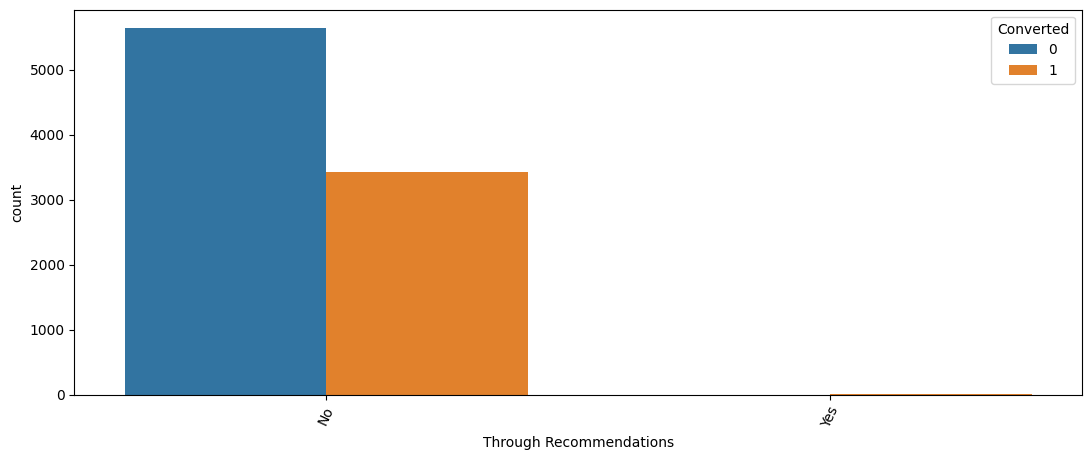

In [357]:
# 17) Through Recommendations
Countplot(df['Through Recommendations'])
df['Through Recommendations'].value_counts(normalize = True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

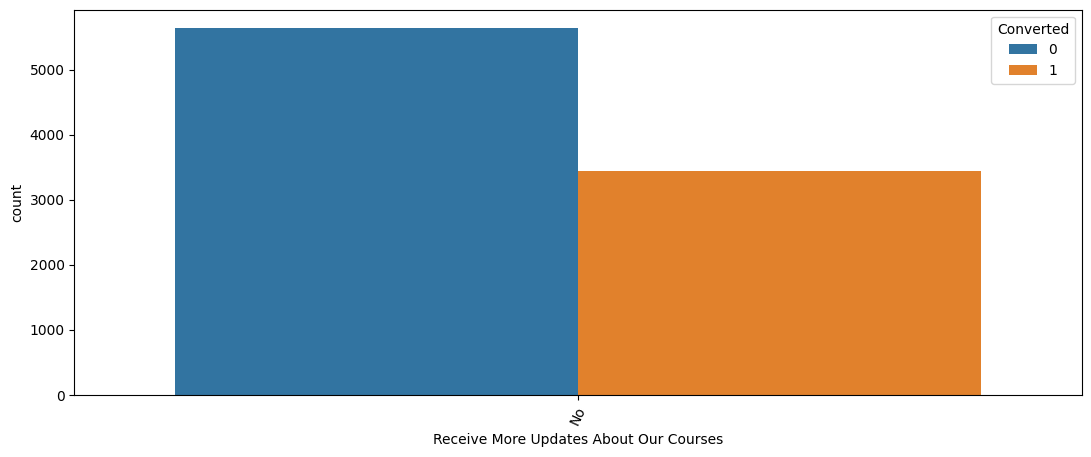

In [358]:
# 17) Receive More Updates About Our Courses
Countplot(df['Receive More Updates About Our Courses'])
df['Receive More Updates About Our Courses'].value_counts(normalize = True)

### 21) Tags

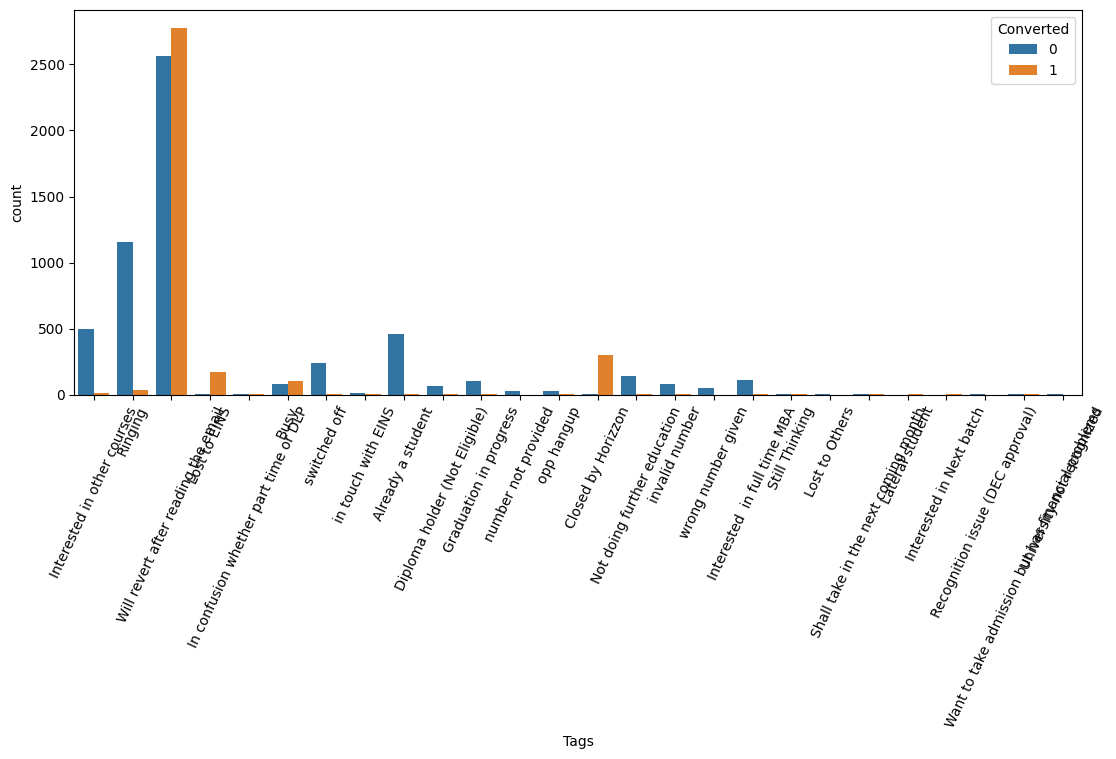

In [359]:
Countplot(df['Tags'])

### Inference
Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

### 22) Update me on Supply Chain Content

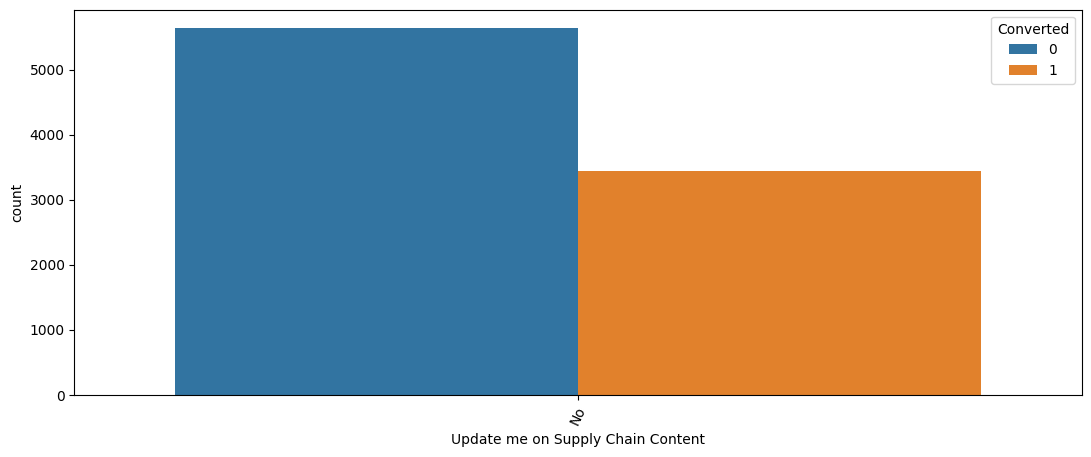

In [360]:
Countplot(df['Update me on Supply Chain Content'])

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 23) Get updates on DM Content

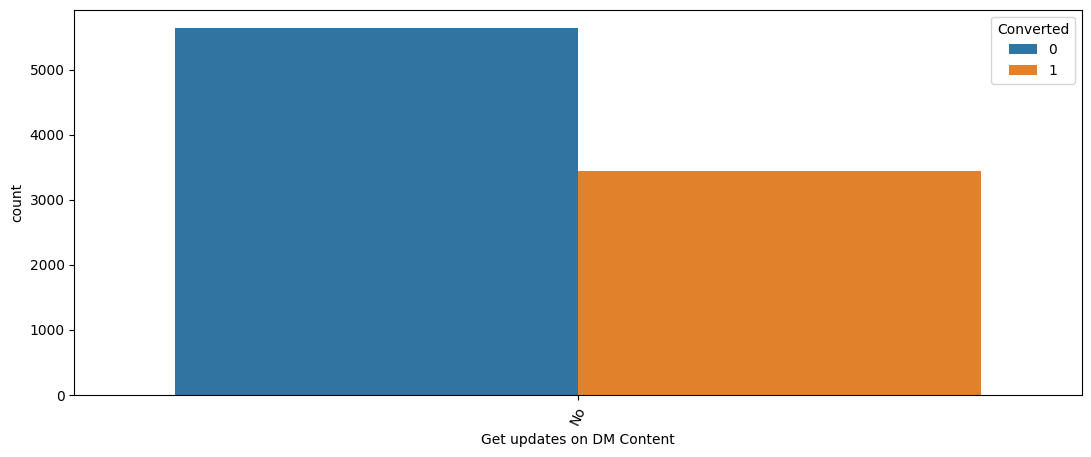

In [361]:
Countplot(df['Get updates on DM Content'])

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 24) City

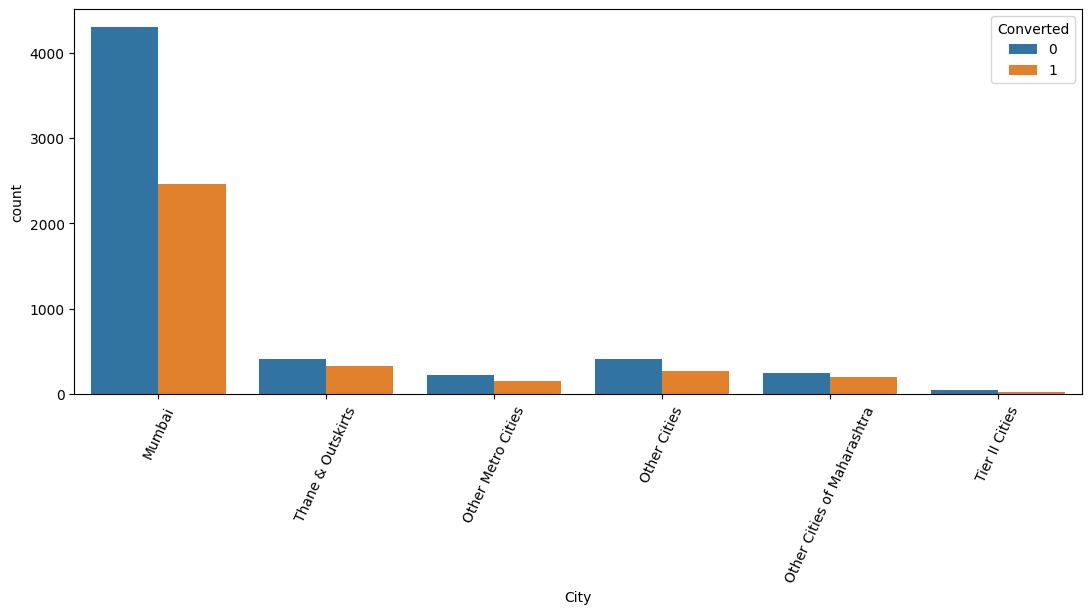

In [362]:
Countplot(df['City'])

### Inference
**Most leads are from Maharashtra state.**

In [363]:
df.groupby('City')['Converted'].mean()

City
Mumbai                         0.363744
Other Cities                   0.400000
Other Cities of Maharashtra    0.439462
Other Metro Cities             0.408488
Thane & Outskirts              0.445638
Tier II Cities                 0.337838
Name: Converted, dtype: float64

### 25) I agree to pay the amount through cheque

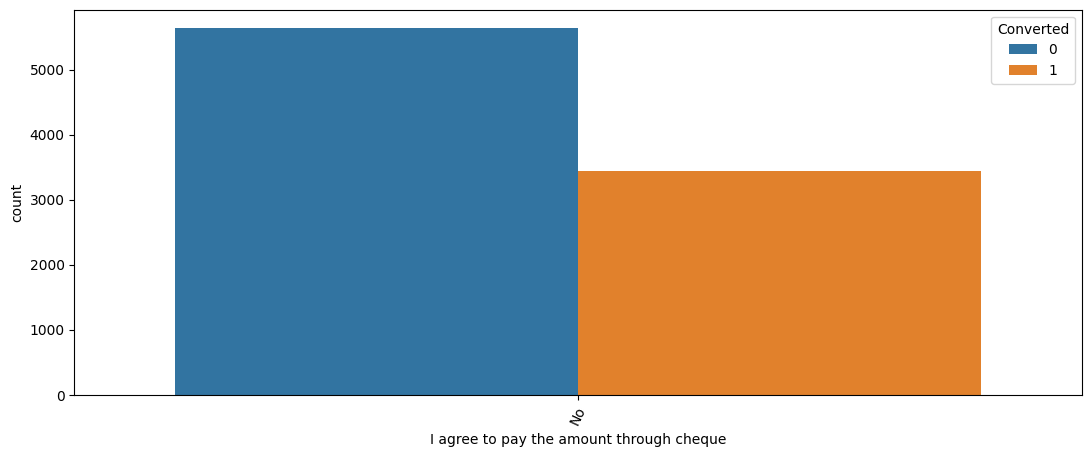

In [364]:
Countplot(df['I agree to pay the amount through cheque'])

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 26) A free copy of Mastering The Interview

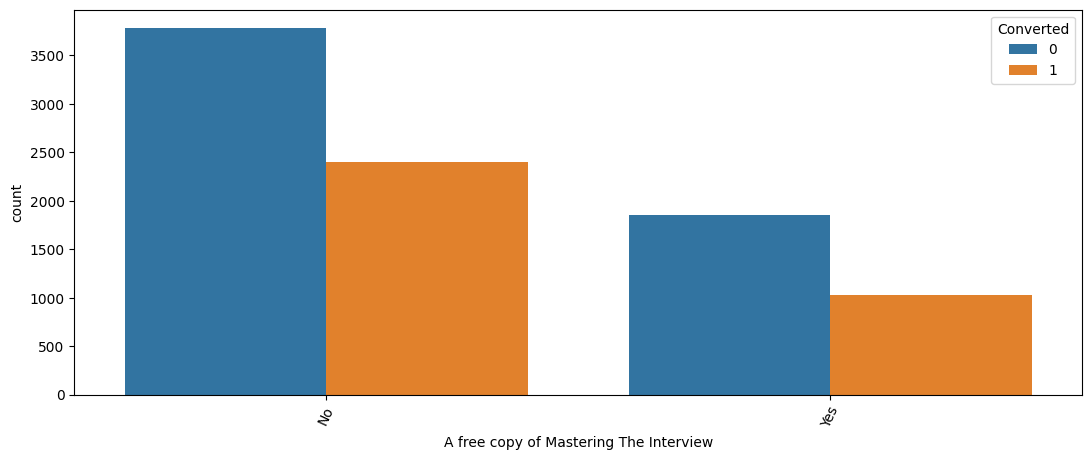

In [365]:
Countplot(df['A free copy of Mastering The Interview'])

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [366]:
df.groupby('A free copy of Mastering The Interview')['Converted'].mean()

A free copy of Mastering The Interview
No     0.388781
Yes    0.356648
Name: Converted, dtype: float64

### 27) Last Notable Activity

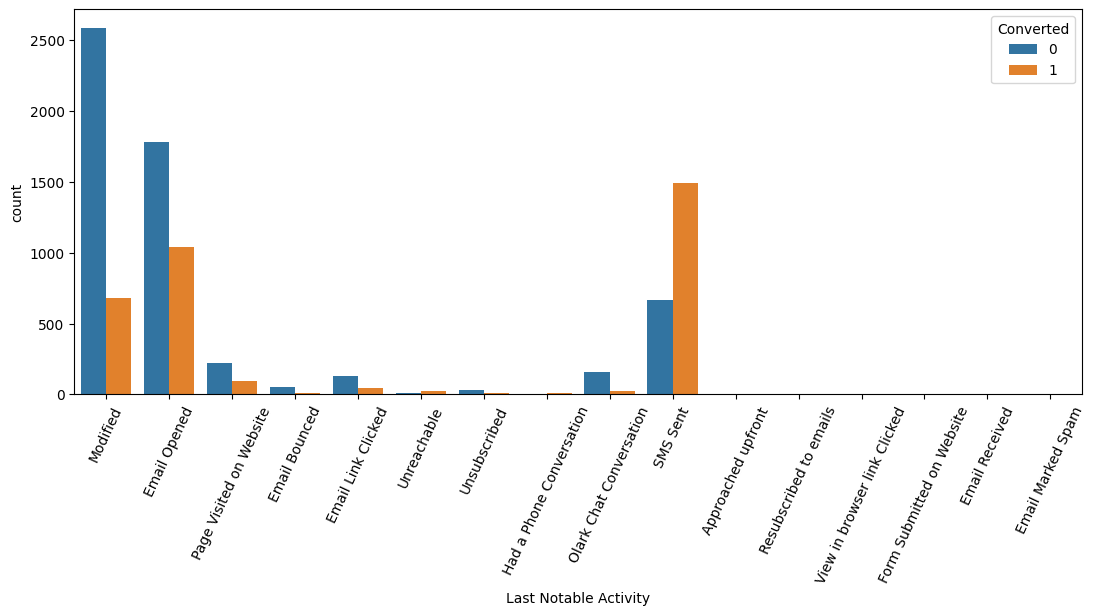

In [367]:
Countplot(df['Last Notable Activity'])

In [368]:
df.groupby('Last Notable Activity')['Converted'].mean()

Last Notable Activity
Approached upfront              1.000000
Email Bounced                   0.150000
Email Link Clicked              0.260116
Email Marked Spam               1.000000
Email Opened                    0.369111
Email Received                  1.000000
Form Submitted on Website       0.000000
Had a Phone Conversation        0.928571
Modified                        0.208142
Olark Chat Conversation         0.136612
Page Visited on Website         0.292453
Resubscribed to emails          1.000000
SMS Sent                        0.691914
Unreachable                     0.687500
Unsubscribed                    0.266667
View in browser link Clicked    0.000000
Name: Converted, dtype: float64

### Results
**Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis**

In [369]:
df = df.drop(['Tags','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            ],1)

In [370]:
df.shape

(9074, 14)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  Occupation                              9074 non-null   obje

## Step 4 : Data Preparation

**1) Converting some binary variables (Yes/No) to 1/0**

In [372]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,No,Modified


In [373]:
vars =  ['Do Not Email','Do Not Call', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

### 2) Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation','Tags', 'City', 'A free copy of Mastering The Interview', Last Notable Activity'

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Do Not Call                             9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  Occupation                              9074 non-null   obje

In [375]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation',
                                      'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [376]:
dummy_data.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [377]:
# Concatenating the dummy_data to the lead_data dataframe
df = pd.concat([df, dummy_data], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


**Dropping the columns for which dummies were created**

In [378]:
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation',
                                      'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'],1,inplace = True)

In [379]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [380]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [381]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [382]:
# Putting target variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [383]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4)  Scaling the features

In [384]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Feature Selection Using RFE

In [385]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [386]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 

In [387]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'Occupation_Housewife', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')



## Step 5 : Model Building

### Assessing the model with StatsModels

### Model-1

In [388]:
import statsmodels.api as sm

In [389]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Sun, 18 Jun 2023   Deviance:                       5180.6
Time:                        08:49:16   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [390]:
#Dropping columns with High P values
col1 = cols.drop(['Occupation_Housewife','Occupation_Student','Last Notable Activity_Had a Phone Conversation'],1)

### Model-2

In [391]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Sun, 18 Jun 2023   Deviance:                       5189.0
Time:                        08:49:16   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [392]:
#Dropping columns with High P values
col1 = col1.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import'],1)

### Model-4

In [393]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.7
Date:                Sun, 18 Jun 2023   Deviance:                       5195.5
Time:                        08:49:16   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [394]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,9.56
2,Lead Origin_Landing Page Submission,5.67
10,Specialization_Others,3.98
3,Lead Source_Olark Chat,2.22
13,Last Notable Activity_Modified,1.86
12,Occupation_Working Professional,1.64
8,Last Activity_SMS Sent,1.63
6,Last Activity_Olark Chat Conversation,1.59
4,Lead Source_Reference,1.45
1,Total Time Spent on Website,1.31


In [395]:
# Dropping the column  'Occupation_Unemployed' because it has high VIF
col1 = col1.drop('Occupation_Unemployed')

### Model-5

In [396]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Sun, 18 Jun 2023   Deviance:                       5203.0
Time:                        08:49:17   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [397]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,Occupation_Working Professional,1.19


In [398]:
# We can drop the some columns which are not important to reduce the variable
col1 = col1.drop(['Last Activity_Unsubscribed','Last Notable Activity_Unreachable'],1)

### Model-6

In [399]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Sun, 18 Jun 2023   Deviance:                       5221.0
Time:                        08:49:17   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [400]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,Occupation_Working Professional,1.18
0,Do Not Email,1.13


**Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.**

### Step 6 : Making Prediction on the Train set

In [401]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

In [402]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

**Creating a dataframe with the actual Converted flag and the predicted probabilities**

In [403]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [404]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


### Making the Confusion matrix

In [405]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


In [406]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8168792316170682


### Metrics beyond simply accuracy

In [407]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives`
FN = confusion[1,0] # false negatives

In [408]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7060506950122649


In [409]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8862996158770806


In [410]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11370038412291933


In [411]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7954859511745739


In [412]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8279904306220096


#### We found out that our specificity was good (~94%) but our sensitivity was only ~65%. Hence, this needed to be taken care of.
#### We have got sensitivity of 65% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [413]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [414]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

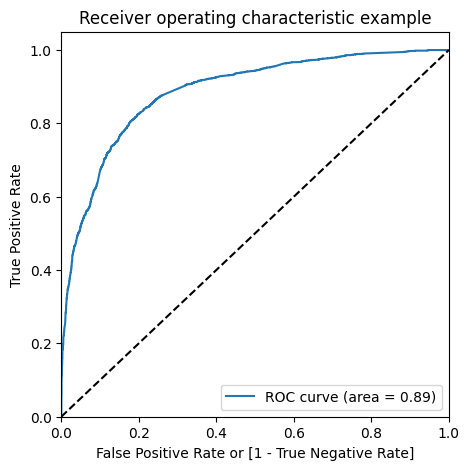

In [415]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.**

### Finding Optimal Cutoff Point

**Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**


In [416]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [417]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


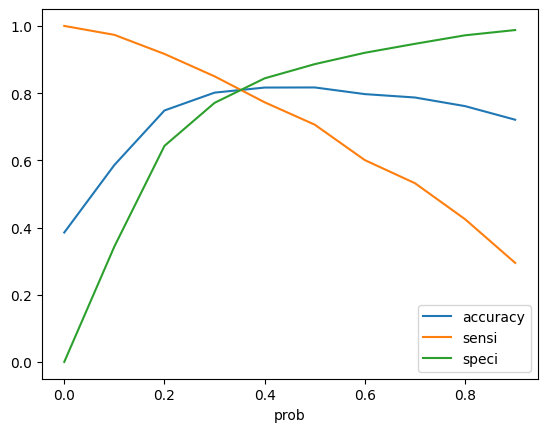

In [418]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [419]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score to the Training data


In [420]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


## Model Evaluation

In [421]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8135726657219335


In [422]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3183,  722],
       [ 462, 1984]])

In [423]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [424]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8111201962387572


In [425]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8151088348271447


In [426]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.1848911651728553


In [427]:
# Positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7331855136733185


In [428]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8732510288065843


## Precision and Recall

* **Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.**
* **Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.**

In [429]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 719, 1727]])

In [430]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7954859511745739


In [431]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7060506950122649


Using sklearn utilities for the same

In [432]:
from sklearn.metrics import precision_score, recall_score

In [433]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7954859511745739


In [434]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7060506950122649


### Precision and recall tradeoff¶

In [435]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [436]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

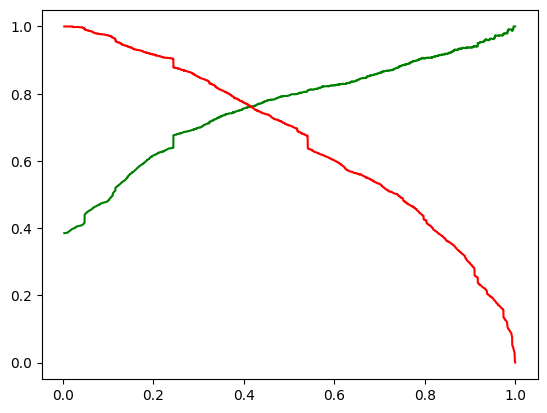

In [437]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall .

## Making predictions on the test set

### Scaling the test data

In [438]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [439]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,Occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [440]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64

In [441]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [442]:
# Let's see the head
y_pred_1.head()

,0
3271,0.130342
1490,0.969057
7936,0.112570
4216,0.802999
3830,0.132924


In [443]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [444]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [445]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [446]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [447]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [448]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [449]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [450]:
# Let's see the head of y_pred_final
y_pred_final.head()


,Prospect ID,Converted,Converted_prob
0,3271,0,0.130342
1,1490,1,0.969057
2,7936,0,0.112570
3,4216,1,0.802999
4,3830,0,0.132924


In [451]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [452]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.130342,0
1,1490,1,0.969057,1
2,7936,0,0.112570,0
3,4216,1,0.802999,1
4,3830,0,0.132924,0


In [453]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8174807197943444


In [454]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1460,  274],
       [ 223,  766]])

In [455]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [456]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7745197168857432


In [457]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8419838523644751


### Assigning Lead Score to the Testing data

In [458]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.130342,0,13
1,1490,1,0.969057,1,97
2,7936,0,0.112570,0,11
3,4216,1,0.802999,1,80
4,3830,0,0.132924,0,13


## Observations:
After running the model on the Test Data , we obtain:

* **Accuracy : 81.7 %**
* **Sensitivity : 77.4 %**
* **Specificity : 84.1 %**

## Results :

### 1) Comparing the values obtained for Train & Test:

#### Train Data:

* **Accuracy : 81.4 %**
* **Sensitivity : 81.1 %**
* **Specificity : 81.5 %**

#### Test Data:

* **Accuracy : 81.7 %**
* **Sensitivity : 77.4 %**
* **Specificity : 84.1 %**

**Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of around 80%.**

### 2) Finding out the leads which should be contacted:
#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [459]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.969057,1,97
8,4223,1,0.916621,1,92
16,1946,1,0.924467,1,92
21,2461,1,0.992551,1,99
23,5822,1,0.997991,1,100
...,...,...,...,...,...
2694,1566,1,0.947723,1,95
2699,6461,1,0.961562,1,96
2703,5741,1,0.908283,1,91
2715,6299,1,0.871977,1,87


**So there are 368 leads which can be contacted and have a high chance of getting converted.  The Prospect ID of the customers to be contacted are :**

In [460]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,
        822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

### 3) Finding out the Important Features  from our final model:

In [461]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website             5.811465
Lead Source_Reference                    3.316598
Occupation_Working Professional          2.608292
Last Activity_Other_Activity             2.175096
Last Activity_SMS Sent                   1.294180
Total Time Spent on Website              1.095412
Lead Source_Olark Chat                   1.081908
const                                   -0.037565
Last Notable Activity_Modified          -0.900449
Last Activity_Olark Chat Conversation   -0.961276
Lead Origin_Landing Page Submission     -1.193957
Specialization_Others                   -1.202474
Do Not Email                            -1.521825
dtype: float64

## Recommendations:

* The company **should make calls** to the leads coming from the `lead sources "Welingak Websites"`  and `"Reference"` as these are more likely to get converted.
* The company **should make calls** to the leads who are the `"working professionals"` as they are more likely to get converted.
* The company **should make calls** to the leads who spent `"more time on the websites"` as these are more likely to get converted.
* The company **should make calls** to the leads coming from the `lead sources "Olark Chat"` as these are more likely to get converted.
* The company **should make calls** to the leads whose `last activity` was `SMS Sent` as they are more likely to get converted.

* The company **should not make calls** to the leads whose `last activity` was `"Olark Chat Conversation"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `lead origin` is `"Landing Page Submission"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `Specialization` was `"Others"` as they are not likely to get converted.
* The company **should not make calls** to the leads who chose the option of `"Do not Email" as "yes"` as they are not likely to get converted.